# Notebook 1: How Machine Learning Really Works
**ML Master Series | Foundations, Bias-Variance & Core Concepts**

---

## 📋 Table of Contents

1. [Introduction](#1-introduction)
2. [What is Machine Learning?](#2-what-is-machine-learning)
3. [Types of Machine Learning](#3-types-of-machine-learning)
4. [Core Concepts: Features, Labels, Samples](#4-core-concepts)
5. [Training vs Inference](#5-training-vs-inference)
6. [Loss Functions & Optimization](#6-loss-functions)
7. [Bias-Variance Tradeoff](#7-bias-variance-tradeoff)
8. [Curse of Dimensionality](#8-curse-of-dimensionality)
9. [No Free Lunch Theorem](#9-no-free-lunch-theorem)
10. [When NOT to Use ML](#10-when-not-to-use-ml)
11. [Summary & Key Takeaways](#11-summary)

---

## 1. Introduction

This notebook establishes the foundational understanding of machine learning before diving into specific algorithms. Understanding these core concepts is critical for:

- **Model Selection:** Knowing why certain algorithms work better for specific problems
- **Debugging:** Identifying whether poor performance stems from bias, variance, or data issues
- **Feature Engineering:** Understanding how features influence model behavior
- **Hyperparameter Tuning:** Making informed decisions rather than random guesses

We will use synthetic datasets to isolate and visualize specific ML behaviors without the noise of real-world data complications.

---

In [1]:
# ============================================================
# ENVIRONMENT SETUP
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load utility functions from ml-handbook-utils dataset
import sys
sys.path.append('/kaggle/input/ml-handbook-utils')
exec(open('/kaggle/input/ml-handbook-utils/utils.py').read())

# Lock random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Configure plotting style
setup_plotting()

print("✅ Environment configured successfully")
print(f"🎲 Random seed: {RANDOM_STATE}")

✅ Environment configured successfully
🎲 Random seed: 42


## 2. What is Machine Learning?

Machine learning is a computational approach that enables systems to automatically learn patterns from data and make predictions or decisions without being explicitly programmed with rule-based logic.

### 2.1 Traditional Programming vs Machine Learning

The fundamental difference lies in how solutions are constructed:

**Traditional Programming:**
```
Input: Data + Rules (manually coded) → Output: Answers
```
Example: `if temperature > 30: print("Hot")`

**Machine Learning:**
```
Input: Data + Answers (labels) → Output: Rules (learned model)
```
The algorithm discovers the relationship between input features and outputs.

### 2.2 Algorithm vs Model

These terms are often confused but represent distinct concepts:

| Concept | Definition | Analogy |
|---------|------------|---------|
| **Algorithm** | The learning procedure or mathematical framework | Recipe |
| **Model** | The trained artifact containing learned parameters | Cooked dish |

**Examples:**
- Algorithm: Linear Regression (the method)
- Model: Trained weights `w` and bias `b` after fitting data

### 2.3 What Does "Learning" Mean?

Machine learning models learn by:

1. **Initialization:** Start with random parameters
2. **Prediction:** Generate outputs using current parameters
3. **Error Calculation:** Measure how wrong predictions are (loss function)
4. **Parameter Update:** Adjust parameters to reduce error
5. **Iteration:** Repeat steps 2-4 until convergence

This process is called **training** or **fitting**.

### 2.4 Parameters vs Hyperparameters

**Parameters:**
- Learned directly from data during training
- Examples: weights in linear regression, split points in decision trees
- Model adjusts these automatically

**Hyperparameters:**
- Configuration settings chosen before training
- Examples: learning rate, tree depth, number of neighbors in kNN
- Data scientist must tune these manually or via search algorithms

---

## 3. Types of Machine Learning

Machine learning approaches are categorized based on the availability and type of supervision during training.

### 3.1 Supervised Learning

**Definition:** The algorithm learns from labeled data where each input has a corresponding correct output.

**Process:**
```
Training Data: X (features) + y (labels) → Model learns f(X) ≈ y
New Data: X_new → Model predicts y_new
```

**Two Main Categories:**

| Type | Target Variable | Examples |
|------|----------------|----------|
| **Regression** | Continuous numerical value | House prices, temperature, stock prices |
| **Classification** | Discrete category/class | Spam detection, disease diagnosis, image recognition |

**Key Characteristics:**
- Requires labeled training data
- Model performance is measurable (we know correct answers)
- Most common approach in industry applications

---

### 3.2 Unsupervised Learning

**Definition:** The algorithm discovers patterns in data without labeled outputs.

**Process:**
```
Training Data: X (features only) → Model finds structure/patterns
```

**Common Tasks:**

| Task | Purpose | Examples |
|------|---------|----------|
| **Clustering** | Group similar data points | Customer segmentation, document categorization |
| **Dimensionality Reduction** | Compress high-dimensional data | PCA for visualization, feature extraction |
| **Anomaly Detection** | Identify unusual patterns | Fraud detection, system monitoring |

**Key Characteristics:**
- No labels required
- Evaluation is more subjective
- Useful for exploratory data analysis

---

### 3.3 Semi-Supervised & Self-Supervised Learning

**Semi-Supervised:**
- Uses small amount of labeled data + large amount of unlabeled data
- Common when labeling is expensive (medical imaging, speech recognition)

**Self-Supervised:**
- Creates labels automatically from data structure
- Example: Predict next word in sentence (language models)

---

### 3.4 Choosing the Right Learning Type

| Situation | Recommended Approach |
|-----------|---------------------|
| You have labeled data and need predictions | Supervised Learning |
| No labels, want to find groups/patterns | Unsupervised Learning |
| Few labels, lots of unlabeled data | Semi-Supervised Learning |
| Want model to learn general representations | Self-Supervised Learning |

---

## 4. Core Concepts: Features, Labels, and Samples

Understanding the fundamental data structures in machine learning is essential before studying algorithms. Every ML problem can be decomposed into these basic elements.

---

### 4.1 Feature (Özellik / Değişken)

**Definition:** A feature is an individual measurable property or characteristic of the phenomenon being observed. Features are the input variables that the model uses to make predictions.

**Terminology Variants:**
- Feature (most common in ML)
- Attribute (database terminology)
- Variable (statistics)
- Predictor (regression context)
- Independent variable (mathematics)

**Feature Types:**

| Type | Description | Examples | Typical Encoding |
|------|-------------|----------|------------------|
| **Numerical - Continuous** | Can take any value within a range | Temperature (23.5°C), Price ($45,230.50) | Used directly |
| **Numerical - Discrete** | Countable integers | Number of rooms (3), Age (25) | Used directly |
| **Categorical - Nominal** | No inherent order | Color (red, blue), City (NYC, LA) | One-hot encoding |
| **Categorical - Ordinal** | Has meaningful order | Education (HS < BS < MS < PhD) | Label encoding or ordinal encoding |
| **Binary** | Two possible values | Yes/No, True/False, 0/1 | 0 or 1 |
| **Text** | Unstructured text | Reviews, descriptions | TF-IDF, embeddings |
| **Datetime** | Temporal information | 2024-01-15 14:30:00 | Extract: year, month, day, hour |

**Feature Quality Indicators:**

✅ **Good Features:**
- Strong correlation with target variable
- Low correlation with other features (low multicollinearity)
- Consistent and reliable measurements
- Available at prediction time

❌ **Problematic Features:**
- High percentage of missing values (>50%)
- Constant or near-constant values (no variance)
- Data leakage (contains future information)
- High cardinality categorical features (too many unique values)

---

### 4.2 Label (Target / Dependent Variable)

**Definition:** The label is the output variable that the model is trained to predict. It represents the "answer" we want the model to learn.

**Terminology Variants:**
- Label (classification context)
- Target (general ML)
- Response variable (statistics)
- Dependent variable (mathematics)
- Output variable (engineering)

**Label Characteristics by Problem Type:**

| Problem Type | Label Nature | Example Labels | Evaluation Metrics |
|--------------|--------------|----------------|-------------------|
| **Binary Classification** | Two classes | Spam/Not Spam, Fraud/Legitimate | Accuracy, Precision, Recall, F1, ROC-AUC |
| **Multiclass Classification** | 3+ mutually exclusive classes | Dog/Cat/Bird, Low/Medium/High | Accuracy, Macro/Micro F1, Confusion Matrix |
| **Multilabel Classification** | Multiple labels per sample | Tags: [Sports, Politics, Tech] | Hamming Loss, Subset Accuracy |
| **Regression** | Continuous numerical value | Price: $150,000, Temperature: 23.5°C | MAE, RMSE, R², MAPE |
| **Ordinal Regression** | Ordered categories | Rating: 1-5 stars | Ordinal accuracy metrics |

**Label Distribution Considerations:**

⚠️ **Imbalanced Labels (Classification):**
```
Class 0: 95% of samples
Class 1: 5% of samples
```
**Impact:** Model may ignore minority class  
**Solutions:** SMOTE, class weights, specialized metrics (F1, PR-AUC)

⚠️ **Skewed Distribution (Regression):**
```
House Prices: Most houses $100K-$300K, few luxury homes $5M+
```
**Impact:** Model biased toward common price range  
**Solutions:** Log transformation, robust loss functions

---

### 4.3 Sample (Instance / Example / Observation)

**Definition:** A sample is a single data point consisting of feature values and (in supervised learning) a corresponding label.

**Terminology Variants:**
- Sample (most common in ML)
- Instance (computer science)
- Example (pedagogical contexts)
- Observation (statistics)
- Record (databases)
- Data point (general)

**Sample Representation:**

**Single Sample:**
```
Sample i:
Features: [x₁, x₂, x₃, ..., xₙ]
Label: yᵢ
```

**Real Example - House:**
```
Features: [Area: 1500 sqft, Bedrooms: 3, Location_Score: 8.2]
Label: Price: $250,000
```

**Dataset Composition:**

| Component | Symbol | Shape | Description |
|-----------|--------|-------|-------------|
| **Feature Matrix** | X | (m, n) | m samples × n features |
| **Target Vector** | y | (m,) or (m, 1) | m labels |
| **Single Sample Features** | xᵢ | (n,) | Feature vector for sample i |
| **Single Sample Label** | yᵢ | scalar | Label for sample i |

**Sample Size Considerations:**

| Dataset Size | Typical Range | Considerations |
|--------------|---------------|----------------|
| **Small** | < 1,000 samples | Risk of overfitting, use simple models, cross-validation critical |
| **Medium** | 1K - 100K | Balanced approach, ensemble methods work well |
| **Large** | 100K - 1M | Deep learning feasible, complex models justified |
| **Big Data** | > 1M samples | Requires distributed computing, potential for very complex models |

---

### 4.4 Feature Matrix and Target Vector

**Mathematical Representation:**

**Feature Matrix X:**
```
       Feature 1  Feature 2  Feature 3  ...  Feature n
Sample 1:   x₁₁      x₁₂        x₁₃    ...    x₁ₙ
Sample 2:   x₂₁      x₂₂        x₂₃    ...    x₂ₙ
Sample 3:   x₃₁      x₃₂        x₃₃    ...    x₃ₙ
   ⋮         ⋮        ⋮          ⋮      ⋮      ⋮
Sample m:   xₘ₁      xₘ₂        xₘ₃    ...    xₘₙ
```

Shape: **(m samples, n features)**

**Target Vector y:**
```
Sample 1:   y₁
Sample 2:   y₂
Sample 3:   y₃
   ⋮        ⋮
Sample m:   yₘ
```

Shape: **(m samples,)**

**Concrete Example - Boston Housing:**
```python
X = [[1500, 3, 20],      # Area, Bedrooms, Age
     [2000, 4, 5],
     [1200, 2, 35]]

y = [250000, 320000, 180000]  # Prices
```

- m = 3 samples (houses)
- n = 3 features
- X.shape = (3, 3)
- y.shape = (3,)

---

### 4.5 Feature Space

**Definition:** Feature space is the mathematical space where each dimension represents one feature, and each sample is a point in this space.

**Dimensionality:**
- **2D Feature Space:** 2 features (x₁, x₂) → Points on a plane
- **3D Feature Space:** 3 features (x₁, x₂, x₃) → Points in 3D space
- **High-Dimensional Space:** n features → Points in n-dimensional space (not visualizable)

**Geometric Interpretation:**

| Concept | Geometric Meaning |
|---------|-------------------|
| **Sample** | A point in feature space |
| **Feature** | An axis/dimension in the space |
| **Distance** | Similarity between samples (closer = more similar) |
| **Decision Boundary** | Separating surface between classes |
| **Cluster** | Dense region of similar points |

**Distance Metrics in Feature Space:**

| Metric | Formula | Use Case |
|--------|---------|----------|
| **Euclidean** | √Σ(xᵢ - yᵢ)² | General purpose, assumes features on similar scales |
| **Manhattan** | Σ\|xᵢ - yᵢ\| | Grid-like paths, less sensitive to outliers |
| **Cosine** | 1 - (x·y)/(\\|x\\|\\|y\\|) | Text data, direction matters more than magnitude |
| **Hamming** | Count of differing positions | Categorical data, binary strings |

**Why Feature Space Matters:**

✅ **Model Selection:**
- Distance-based models (kNN, k-Means) require meaningful distances
- Tree-based models work in original feature space without distance assumptions

✅ **Feature Scaling:**
- Features with large ranges dominate distance calculations
- Standardization puts all features on comparable scales

✅ **Curse of Dimensionality:**
- As dimensions increase, space becomes exponentially sparse
- Distance-based methods lose effectiveness in high dimensions

---

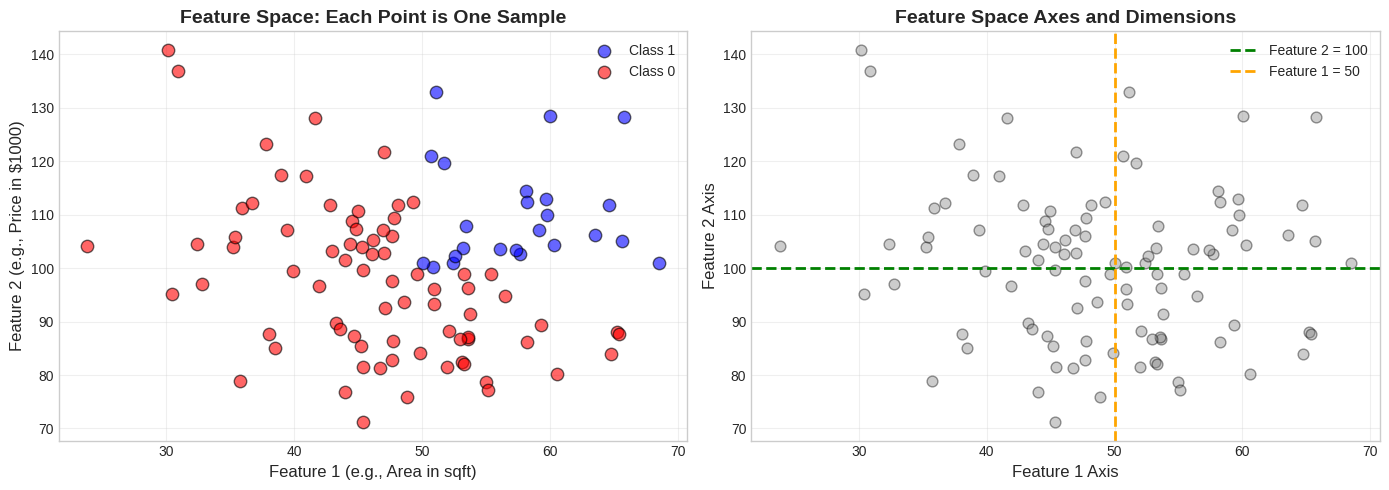

📊 Generated 100 samples in 2D feature space
Feature 1 range: [23.8, 68.5]
Feature 2 range: [71.2, 140.8]


In [2]:
# ============================================================
# VISUALIZATION: FEATURE SPACE CONCEPT
# Demonstrating how samples exist as points in feature space
# ============================================================

# Generate synthetic 2D data for visualization
np.random.seed(RANDOM_STATE)
n_samples = 100

# Create two feature dimensions
feature_1 = np.random.randn(n_samples) * 10 + 50
feature_2 = np.random.randn(n_samples) * 15 + 100

# Create a simple target based on features (for coloring)
target = (feature_1 > 50) & (feature_2 > 100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Feature space with samples
axes[0].scatter(feature_1[target], feature_2[target], 
                c='blue', alpha=0.6, s=80, label='Class 1', edgecolor='k')
axes[0].scatter(feature_1[~target], feature_2[~target], 
                c='red', alpha=0.6, s=80, label='Class 0', edgecolor='k')
axes[0].set_xlabel('Feature 1 (e.g., Area in sqft)', fontsize=12)
axes[0].set_ylabel('Feature 2 (e.g., Price in $1000)', fontsize=12)
axes[0].set_title('Feature Space: Each Point is One Sample', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Feature space with coordinate system highlighted
axes[1].scatter(feature_1, feature_2, c='gray', alpha=0.4, s=60, edgecolor='k')
axes[1].axhline(y=100, color='green', linestyle='--', linewidth=2, label='Feature 2 = 100')
axes[1].axvline(x=50, color='orange', linestyle='--', linewidth=2, label='Feature 1 = 50')
axes[1].set_xlabel('Feature 1 Axis', fontsize=12)
axes[1].set_ylabel('Feature 2 Axis', fontsize=12)
axes[1].set_title('Feature Space Axes and Dimensions', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Generated {n_samples} samples in 2D feature space")
print(f"Feature 1 range: [{feature_1.min():.1f}, {feature_1.max():.1f}]")
print(f"Feature 2 range: [{feature_2.min():.1f}, {feature_2.max():.1f}]")

### 4.6 Key Relationships Between Concepts

**Hierarchical Structure:**
```
Dataset
├── Samples (rows) - m samples
│   ├── Sample 1
│   ├── Sample 2
│   └── ...
└── Features (columns) - n features
    ├── Feature 1
    ├── Feature 2
    └── ...
    
Each Sample contains:
├── Feature values [x₁, x₂, ..., xₙ]
└── Label value yᵢ (in supervised learning)
```

**Notation Summary:**

| Symbol | Meaning | Typical Shape |
|--------|---------|---------------|
| **m** | Number of samples | Scalar |
| **n** | Number of features | Scalar |
| **X** | Complete feature matrix | (m, n) |
| **y** | Complete target vector | (m,) |
| **xᵢ** | Feature vector for sample i | (n,) |
| **yᵢ** | Label for sample i | Scalar |
| **xᵢⱼ** | Value of feature j in sample i | Scalar |

**Common Pitfalls:**

❌ **Confusion: Rows vs Columns**
- Rows = Samples (observations)
- Columns = Features (variables)
- Remember: "More samples (rows) = better learning"

❌ **Target as Feature**
- Never include target variable in feature matrix X
- This causes data leakage and artificially perfect predictions

❌ **Index Confusion**
- Sample index: i = 1, 2, ..., m
- Feature index: j = 1, 2, ..., n
- xᵢⱼ means "sample i, feature j"

---

## 5. Training vs Inference

Machine learning models operate in two distinct phases: training (learning from data) and inference (making predictions on new data). Understanding this separation is fundamental to ML system design.

---

### 5.1 Training Phase (Learning / Fitting)

**Definition:** Training is the process where the model learns patterns from labeled data by iteratively adjusting its internal parameters to minimize prediction errors.

**Training Process Flow:**
```
Input: Training Data (X_train, y_train)
                ↓
    Initialize Parameters (random or zero)
                ↓
        ┌───────────────────┐
        │   Training Loop   │
        │                   │
        │  1. Predict       │
        │  2. Calculate Loss│
        │  3. Update Params │
        └───────────────────┘
                ↓
    Repeat until convergence
                ↓
Output: Trained Model (learned parameters)
```

**What Happens During Training:**

| Step | Process | Details |
|------|---------|---------|
| **1. Forward Pass** | Model makes predictions | ŷ = f(X; θ) where θ are current parameters |
| **2. Loss Calculation** | Measure prediction error | L = Loss(y_true, y_pred) |
| **3. Backward Pass** | Calculate gradients | ∂L/∂θ for each parameter |
| **4. Parameter Update** | Adjust weights | θ_new = θ_old - learning_rate × gradient |
| **5. Iteration** | Repeat steps 1-4 | Continue until loss converges or max iterations |

**Training Characteristics:**

✅ **Computational Requirements:**
- **Time:** Can be slow (minutes to days depending on data size and model complexity)
- **Memory:** Requires holding entire training dataset or large batches
- **Hardware:** Often benefits from GPU/TPU acceleration for deep learning

✅ **Data Requirements:**
- Needs labeled data (supervised learning)
- Typically uses 70-80% of available data
- May process data in batches (batch gradient descent)

✅ **Output:**
- Learned parameters (weights, biases)
- Model architecture
- Training history (loss curves, metrics)

---

### 5.2 Inference Phase (Prediction / Testing)

**Definition:** Inference is the process of applying the trained model to new, unseen data to generate predictions. No parameter updates occur during inference.

**Inference Process Flow:**
```
Input: New Data (X_new) + Trained Model
                ↓
    Load Trained Parameters
                ↓
        Forward Pass Only
                ↓
    Generate Predictions (ŷ_new)
                ↓
Output: Predictions (no model changes)
```

**What Happens During Inference:**

| Aspect | Description |
|--------|-------------|
| **Forward Pass Only** | Model uses learned parameters to compute output |
| **No Gradient Calculation** | Backpropagation is not performed |
| **No Parameter Updates** | Model weights remain frozen |
| **Prediction Output** | Returns class labels or numerical values |

**Inference Characteristics:**

✅ **Computational Requirements:**
- **Time:** Fast (milliseconds to seconds)
- **Memory:** Only needs to store single sample or small batch
- **Hardware:** CPU often sufficient, unless real-time requirements

✅ **Data Requirements:**
- No labels needed
- Can process single samples or batches
- Must have same feature structure as training data

✅ **Output:**
- Predictions (class labels or continuous values)
- Confidence scores / probabilities (for classification)
- No model updates

---

### 5.3 Train-Test Split: The Sacred Separation

**Core Principle:** Never use the same data for both training and final evaluation. This separation ensures unbiased performance assessment.

**Data Split Strategy:**
```
Complete Dataset (100%)
        ↓
    Split
    ↙     ↘
Training Set    Test Set
(70-80%)        (20-30%)
    ↓              ↓
Model learns    Model evaluated
from this       on this (once)
    ↓              ↓
Parameters      Performance
updated         measured
```

**Advanced Split with Validation:**
```
Complete Dataset (100%)
        ↓
    Split
    ↙     ↘
Training Set    Test Set
(60-70%)        (15-20%)
    ↓              ↓
Split again      Hold out
    ↙     ↘         until final
Train     Validation evaluation
(80%)     (20%)
    ↓         ↓
Learn    Tune hyperparameters
params   & model selection
```

**Why This Separation is Critical:**

| Scenario | Issue | Consequence |
|----------|-------|-------------|
| **Training on Test Data** | Data leakage | Overly optimistic performance metrics |
| **Tuning on Test Data** | Indirect leakage | Model implicitly learns test patterns |
| **No Validation Set** | Overfitting risk | Hyperparameters optimized for training data |
| **Too Small Test Set** | High variance | Unreliable performance estimates |

**Rules of Data Splitting:**

✅ **DO:**
- Split data before any preprocessing (except initial cleaning)
- Use stratified sampling for imbalanced classification
- Keep test set completely untouched until final evaluation
- Use cross-validation on training set for robust evaluation

❌ **DON'T:**
- Preprocess entire dataset before splitting (causes leakage)
- Use test set for hyperparameter tuning
- Split time-series data randomly (breaks temporal ordering)
- Make test set too small (< 15% of data)

---

### 5.4 Cross-Validation: Robust Training Evaluation

**Definition:** Cross-validation splits training data into multiple folds, training on k-1 folds and validating on the remaining fold, rotating through all combinations.

**k-Fold Cross-Validation Process:**
```
Training Data Split into k=5 Folds:
[Fold 1][Fold 2][Fold 3][Fold 4][Fold 5]

Iteration 1: [Test][Train][Train][Train][Train] → Score 1
Iteration 2: [Train][Test][Train][Train][Train] → Score 2
Iteration 3: [Train][Train][Test][Train][Train] → Score 3
Iteration 4: [Train][Train][Train][Test][Train] → Score 4
Iteration 5: [Train][Train][Train][Train][Test] → Score 5

Final Score: Average(Score 1, 2, 3, 4, 5)
```

**Cross-Validation Variants:**

| Type | Description | Use Case |
|------|-------------|----------|
| **k-Fold** | Split into k equal parts | General purpose, k=5 or k=10 typical |
| **Stratified k-Fold** | Maintains class distribution in each fold | Imbalanced classification |
| **Leave-One-Out (LOO)** | k = n (each sample tested once) | Small datasets, computationally expensive |
| **Time Series Split** | Respects temporal order | Time-dependent data |
| **Group k-Fold** | Keeps groups together | Patient records, multiple samples per subject |

**Benefits of Cross-Validation:**

✅ **More Reliable Estimates:**
- Reduces variance in performance metrics
- Every sample used for both training and validation

✅ **Better Model Selection:**
- Compare models on multiple data splits
- Reduces risk of lucky/unlucky single split

✅ **Efficient Data Usage:**
- Especially important for small datasets
- All data contributes to performance estimate

**Limitations:**

⚠️ **Computational Cost:**
- k-fold requires training k models
- LOO requires training n models (prohibitive for large n)

⚠️ **Still Requires Final Test Set:**
- Cross-validation is for model selection/tuning
- Final performance must be evaluated on held-out test set

---

### 5.5 Training vs Inference Comparison Table

| Aspect | Training Phase | Inference Phase |
|--------|----------------|-----------------|
| **Purpose** | Learn patterns from data | Apply learned knowledge |
| **Data** | Labeled data (X, y) | New data (X only) |
| **Parameters** | Updated continuously | Frozen (no changes) |
| **Computation** | Forward + Backward pass | Forward pass only |
| **Time** | Slow (hours to days) | Fast (milliseconds) |
| **Memory** | High (stores gradients) | Low (only predictions) |
| **Frequency** | Once or periodically | Continuously |
| **Output** | Trained model | Predictions |
| **Evaluation** | Training/validation metrics | Test metrics or real-world performance |

---

### 5.6 Common Mistakes in Train-Test Separation

❌ **Mistake 1: Preprocessing Before Splitting**
```python
# WRONG: Scaling before split causes data leakage
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test = train_test_split(X_scaled)
```

✅ **Correct Approach:**
```python
# RIGHT: Split first, then fit scaler only on training data
X_train, X_test = train_test_split(X)
scaler = StandardScaler().fit(X_train)  # Learn from train only
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply to test
```

❌ **Mistake 2: Using Test Set for Model Selection**
```python
# WRONG: Repeatedly testing on same test set
for model in models:
    score = model.score(X_test, y_test)  # Test set contaminated
    if score > best_score:
        best_model = model
```

✅ **Correct Approach:**
```python
# RIGHT: Use validation set or cross-validation
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    if scores.mean() > best_score:
        best_model = model

# Only after final model selected, evaluate on test set ONCE
final_score = best_model.score(X_test, y_test)
```

❌ **Mistake 3: Time Series Data with Random Split**
```python
# WRONG: Random split destroys temporal ordering
X_train, X_test = train_test_split(X_timeseries, shuffle=True)
```

✅ **Correct Approach:**
```python
# RIGHT: Respect temporal order
split_point = int(0.8 * len(X_timeseries))
X_train = X_timeseries[:split_point]
X_test = X_timeseries[split_point:]
```

---

DATASET SPLIT SUMMARY
Total samples: 200
Training samples: 140 (70.0%)
Test samples: 60 (30.0%)

🔵 TRAINING PHASE STARTED...
✅ Training complete!
   Learned coefficient (slope): 84.9533
   Learned intercept (bias): 2.6620

🟢 INFERENCE PHASE STARTED...
✅ Inference complete!
   Test RMSE: 21.5642
   Test R²: 0.9490


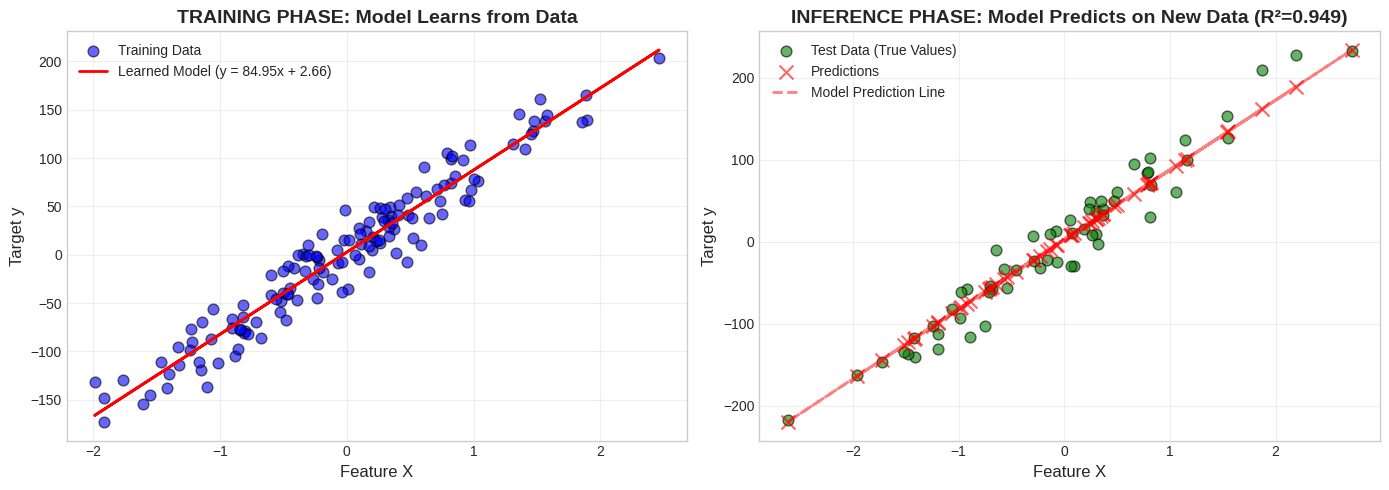

In [3]:
# ============================================================
# DEMONSTRATION: TRAINING VS INFERENCE
# Visualizing the complete ML workflow with synthetic data
# ============================================================

# Generate synthetic regression data
X_full, y_full = make_regression(
    n_samples=200,
    n_features=1,
    noise=20,
    random_state=RANDOM_STATE
)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, 
    test_size=0.3, 
    random_state=RANDOM_STATE
)

print("="*60)
print("DATASET SPLIT SUMMARY")
print("="*60)
print(f"Total samples: {len(X_full)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X_full)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X_full)*100:.1f}%)")
print("="*60)

# ============================================================
# TRAINING PHASE
# ============================================================
print("\n🔵 TRAINING PHASE STARTED...")

# Initialize model
model = LinearRegression()

# Train model (learning happens here)
model.fit(X_train, y_train)

# Extract learned parameters
learned_coef = model.coef_[0]
learned_intercept = model.intercept_

print(f"✅ Training complete!")
print(f"   Learned coefficient (slope): {learned_coef:.4f}")
print(f"   Learned intercept (bias): {learned_intercept:.4f}")

# ============================================================
# INFERENCE PHASE
# ============================================================
print("\n🟢 INFERENCE PHASE STARTED...")

# Make predictions on test set (no training, just prediction)
y_pred_test = model.predict(X_test)

# Calculate performance metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print(f"✅ Inference complete!")
print(f"   Test RMSE: {test_rmse:.4f}")
print(f"   Test R²: {test_r2:.4f}")
print("="*60)

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training phase visualization
axes[0].scatter(X_train, y_train, c='blue', alpha=0.6, s=60, 
                edgecolor='k', label='Training Data')
axes[0].plot(X_train, model.predict(X_train), 'r-', linewidth=2, 
             label=f'Learned Model (y = {learned_coef:.2f}x + {learned_intercept:.2f})')
axes[0].set_xlabel('Feature X', fontsize=12)
axes[0].set_ylabel('Target y', fontsize=12)
axes[0].set_title('TRAINING PHASE: Model Learns from Data', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Inference phase visualization
axes[1].scatter(X_test, y_test, c='green', alpha=0.6, s=60, 
                edgecolor='k', label='Test Data (True Values)')
axes[1].scatter(X_test, y_pred_test, c='red', alpha=0.6, 
                marker='x', s=100, label='Predictions')  # FIXED: removed duplicate s parameter
axes[1].plot(X_test, model.predict(X_test), 'r--', linewidth=2, alpha=0.5,
             label='Model Prediction Line')
axes[1].set_xlabel('Feature X', fontsize=12)
axes[1].set_ylabel('Target y', fontsize=12)
axes[1].set_title(f'INFERENCE PHASE: Model Predicts on New Data (R²={test_r2:.3f})', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

DATA LEAKAGE DEMONSTRATION
Feature 1 - Mean: 5006.34, Std: 955.40
Feature 2 - Mean: 0.50, Std: 0.10

❌ WRONG: Scaling before train-test split
   Scaler learned from: ALL 200 samples
   Test set mean after scaling: [-0.0751, 0.0020]
   Test set std after scaling: [0.9979, 1.0562]
   Test R² (with leakage): 0.9970
   ⚠️  Model has seen test set statistics during scaling!

✅ CORRECT: Train-test split before scaling
   Scaler learned from: ONLY 140 training samples
   Test set mean after scaling: [-0.1074, 0.0029]
   Test set std after scaling: [0.9987, 1.0834]
   Test R² (no leakage): 0.9970
   ✅ Model has never seen test set during preprocessing!

COMPARISON
Wrong approach R²: 0.9970
Correct approach R²: 0.9970
Score difference: 0.0000

🔍 Key Insight:
Although R² scores are similar, notice the TEST SET STATISTICS:

Wrong Approach (Leakage):
  - Test mean: [-0.0751, 0.0020] (closer to [0, 0])
  - Test std: [0.9979, 1.0562] (closer to [1, 1])
  ⚠️  Scaler learned mean/std from ENTIRE datas

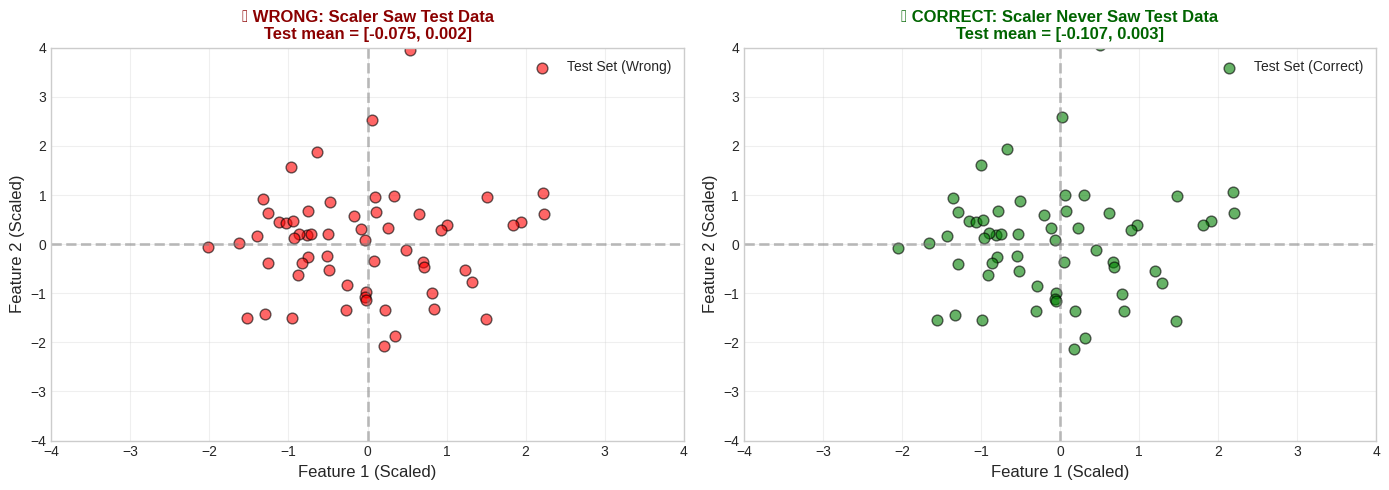

In [4]:
# ============================================================
# DEMONSTRATION: DATA LEAKAGE EXAMPLE
# Showing the impact of incorrect preprocessing order
# ============================================================

from sklearn.preprocessing import StandardScaler

# Generate data with clear scale difference and noise
np.random.seed(RANDOM_STATE)
X_leakage = np.random.randn(200, 2)
X_leakage[:, 0] = X_leakage[:, 0] * 1000 + 5000  # Feature 1: large scale (mean=5000, std=1000)
X_leakage[:, 1] = X_leakage[:, 1] * 0.1 + 0.5    # Feature 2: small scale (mean=0.5, std=0.1)

# Create target with specific relationship
y_leakage = 2 * X_leakage[:, 0] + 50 * X_leakage[:, 1] + np.random.randn(200) * 100

print("="*60)
print("DATA LEAKAGE DEMONSTRATION")
print("="*60)
print(f"Feature 1 - Mean: {X_leakage[:, 0].mean():.2f}, Std: {X_leakage[:, 0].std():.2f}")
print(f"Feature 2 - Mean: {X_leakage[:, 1].mean():.2f}, Std: {X_leakage[:, 1].std():.2f}")

# ============================================================
# WRONG WAY: Scale before split (DATA LEAKAGE)
# ============================================================
print("\n❌ WRONG: Scaling before train-test split")
scaler_wrong = StandardScaler()
X_scaled_wrong = scaler_wrong.fit_transform(X_leakage)  # Learns from ALL data
X_train_wrong, X_test_wrong, y_train_wrong, y_test_wrong = train_test_split(
    X_scaled_wrong, y_leakage, test_size=0.3, random_state=RANDOM_STATE
)

model_wrong = LinearRegression()
model_wrong.fit(X_train_wrong, y_train_wrong)
score_wrong = model_wrong.score(X_test_wrong, y_test_wrong)

# Get test set statistics from wrong approach
test_mean_wrong = X_test_wrong.mean(axis=0)
test_std_wrong = X_test_wrong.std(axis=0)

print(f"   Scaler learned from: ALL {len(X_leakage)} samples")
print(f"   Test set mean after scaling: [{test_mean_wrong[0]:.4f}, {test_mean_wrong[1]:.4f}]")
print(f"   Test set std after scaling: [{test_std_wrong[0]:.4f}, {test_std_wrong[1]:.4f}]")
print(f"   Test R² (with leakage): {score_wrong:.4f}")
print(f"   ⚠️  Model has seen test set statistics during scaling!")

# ============================================================
# RIGHT WAY: Split first, then scale (NO LEAKAGE)
# ============================================================
print("\n✅ CORRECT: Train-test split before scaling")
X_train_right, X_test_right, y_train_right, y_test_right = train_test_split(
    X_leakage, y_leakage, test_size=0.3, random_state=RANDOM_STATE
)

scaler_right = StandardScaler()
X_train_scaled_right = scaler_right.fit_transform(X_train_right)  # Learn from train only
X_test_scaled_right = scaler_right.transform(X_test_right)       # Apply to test

# Get test set statistics from correct approach
test_mean_right = X_test_scaled_right.mean(axis=0)
test_std_right = X_test_scaled_right.std(axis=0)

model_right = LinearRegression()
model_right.fit(X_train_scaled_right, y_train_right)
score_right = model_right.score(X_test_scaled_right, y_test_right)

print(f"   Scaler learned from: ONLY {len(X_train_right)} training samples")
print(f"   Test set mean after scaling: [{test_mean_right[0]:.4f}, {test_mean_right[1]:.4f}]")
print(f"   Test set std after scaling: [{test_std_right[0]:.4f}, {test_std_right[1]:.4f}]")
print(f"   Test R² (no leakage): {score_right:.4f}")
print(f"   ✅ Model has never seen test set during preprocessing!")

print("\n" + "="*60)
print("COMPARISON")
print("="*60)
print(f"Wrong approach R²: {score_wrong:.4f}")
print(f"Correct approach R²: {score_right:.4f}")
print(f"Score difference: {abs(score_wrong - score_right):.4f}")
print("\n🔍 Key Insight:")
print("Although R² scores are similar, notice the TEST SET STATISTICS:")
print("\nWrong Approach (Leakage):")
print(f"  - Test mean: [{test_mean_wrong[0]:.4f}, {test_mean_wrong[1]:.4f}] (closer to [0, 0])")
print(f"  - Test std: [{test_std_wrong[0]:.4f}, {test_std_wrong[1]:.4f}] (closer to [1, 1])")
print("  ⚠️  Scaler learned mean/std from ENTIRE dataset including test!")
print("\nCorrect Approach (No Leakage):")
print(f"  - Test mean: [{test_mean_right[0]:.4f}, {test_mean_right[1]:.4f}] (deviates from [0, 0])")
print(f"  - Test std: [{test_std_right[0]:.4f}, {test_std_right[1]:.4f}] (deviates from [1, 1])")
print("  ✅ Scaler learned mean/std ONLY from training data!")
print("\nWhy this matters:")
print("In real deployment, new data won't have mean=0, std=1 relative to")
print("training statistics. The correct approach simulates this reality.")
print("="*60)

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Wrong approach - test set statistics
axes[0].scatter(X_test_wrong[:, 0], X_test_wrong[:, 1], c='red', alpha=0.6, s=60, 
                edgecolor='k', label='Test Set (Wrong)')
axes[0].axhline(y=0, color='gray', linestyle='--', alpha=0.5, linewidth=2)
axes[0].axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=2)
axes[0].set_xlabel('Feature 1 (Scaled)', fontsize=12)
axes[0].set_ylabel('Feature 2 (Scaled)', fontsize=12)
axes[0].set_title(f'❌ WRONG: Scaler Saw Test Data\nTest mean = [{test_mean_wrong[0]:.3f}, {test_mean_wrong[1]:.3f}]', 
                  fontsize=12, fontweight='bold', color='darkred')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-4, 4)
axes[0].set_ylim(-4, 4)

# Plot 2: Correct approach - test set statistics
axes[1].scatter(X_test_scaled_right[:, 0], X_test_scaled_right[:, 1], c='green', 
                alpha=0.6, s=60, edgecolor='k', label='Test Set (Correct)')
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5, linewidth=2)
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=2)
axes[1].set_xlabel('Feature 1 (Scaled)', fontsize=12)
axes[1].set_ylabel('Feature 2 (Scaled)', fontsize=12)
axes[1].set_title(f'✅ CORRECT: Scaler Never Saw Test Data\nTest mean = [{test_mean_right[0]:.3f}, {test_mean_right[1]:.3f}]', 
                  fontsize=12, fontweight='bold', color='darkgreen')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(-4, 4)

plt.tight_layout()
plt.show()

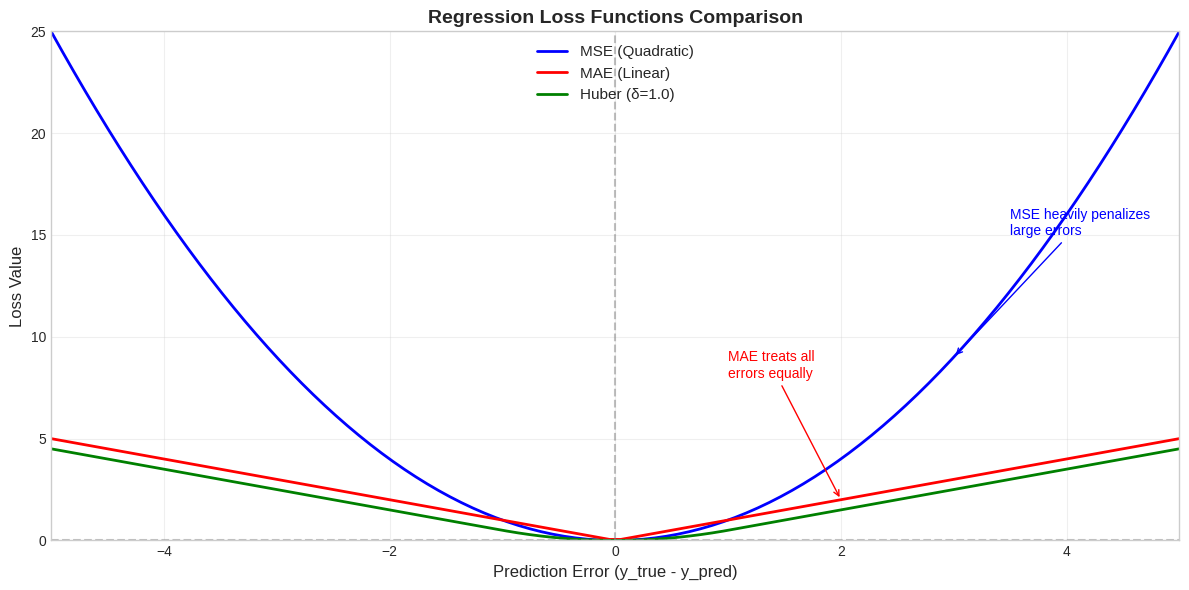

📊 Loss Function Characteristics:
MSE: Quadratic penalty - small errors minimal, large errors severe
MAE: Linear penalty - all errors treated proportionally
Huber: Hybrid - quadratic for small errors, linear for large errors


In [5]:
# ============================================================
# VISUALIZATION: DIFFERENT LOSS FUNCTIONS
# Comparing MSE, MAE, and Huber loss behavior
# ============================================================

# Create range of errors
errors = np.linspace(-5, 5, 100)

# Calculate different losses
mse_loss = errors ** 2
mae_loss = np.abs(errors)

# Huber loss with delta=1.0
delta = 1.0
huber_loss = np.where(
    np.abs(errors) <= delta,
    0.5 * errors**2,
    delta * np.abs(errors) - 0.5 * delta**2
)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(errors, mse_loss, 'b-', linewidth=2, label='MSE (Quadratic)')
plt.plot(errors, mae_loss, 'r-', linewidth=2, label='MAE (Linear)')
plt.plot(errors, huber_loss, 'g-', linewidth=2, label=f'Huber (δ={delta})')

plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Prediction Error (y_true - y_pred)', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('Regression Loss Functions Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(0, 25)

# Annotate key regions
plt.annotate('MSE heavily penalizes\nlarge errors', 
             xy=(3, 9), xytext=(3.5, 15),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=10, color='blue')

plt.annotate('MAE treats all\nerrors equally', 
             xy=(2, 2), xytext=(1, 8),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("📊 Loss Function Characteristics:")
print("="*60)
print("MSE: Quadratic penalty - small errors minimal, large errors severe")
print("MAE: Linear penalty - all errors treated proportionally")
print("Huber: Hybrid - quadratic for small errors, linear for large errors")
print("="*60)

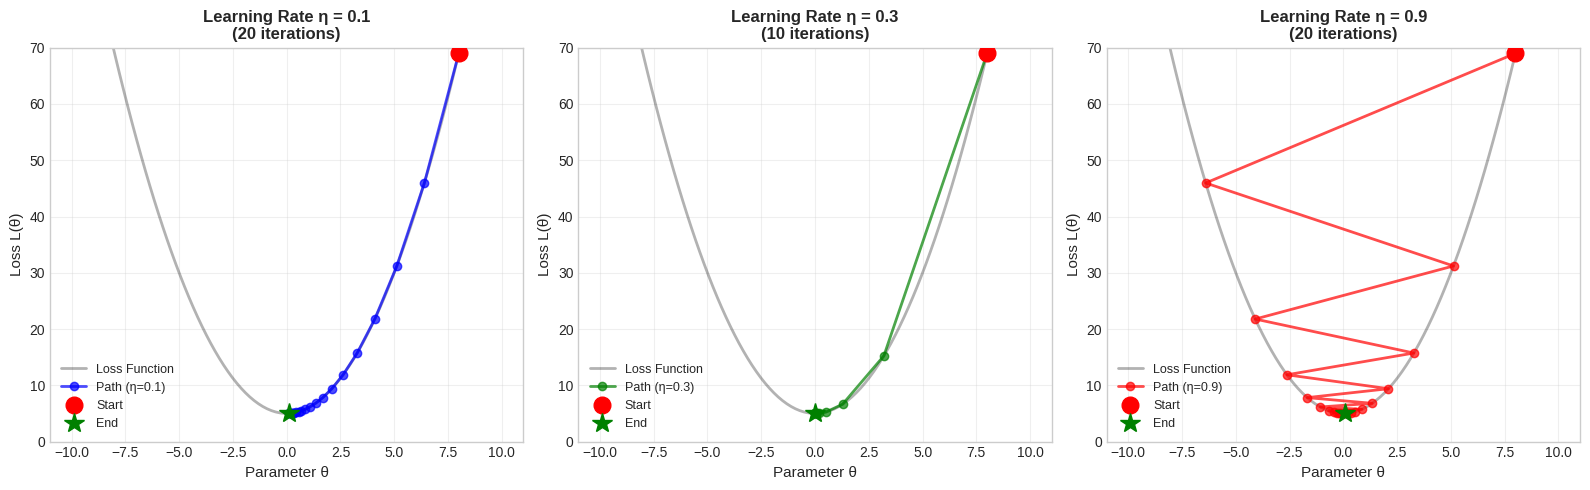

🎯 Gradient Descent Learning Rate Analysis:
η = 0.1 (Small): Slow but steady convergence
η = 0.3 (Optimal): Fast and stable convergence
η = 0.9 (Large): Oscillations but still converges


In [6]:
# ============================================================
# VISUALIZATION: GRADIENT DESCENT OPTIMIZATION
# Demonstrating how gradient descent finds minimum
# ============================================================

# Create a simple quadratic loss landscape
theta_values = np.linspace(-10, 10, 100)
loss_values = theta_values ** 2 + 5  # Simple parabola: L(θ) = θ² + 5

# Simulate gradient descent with different learning rates
learning_rates = [0.1, 0.3, 0.9]
colors = ['blue', 'green', 'red']
max_iterations = 20

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (lr, color) in enumerate(zip(learning_rates, colors)):
    ax = axes[idx]
    
    # Plot loss landscape
    ax.plot(theta_values, loss_values, 'k-', linewidth=2, alpha=0.3, label='Loss Function')
    
    # Initialize parameter
    theta = 8.0  # Starting point
    trajectory_theta = [theta]
    trajectory_loss = [theta**2 + 5]
    
    # Gradient descent iterations
    for i in range(max_iterations):
        # Gradient of L(θ) = θ² + 5 is dL/dθ = 2θ
        gradient = 2 * theta
        
        # Update parameter
        theta = theta - lr * gradient
        
        trajectory_theta.append(theta)
        trajectory_loss.append(theta**2 + 5)
        
        # Stop if converged
        if abs(gradient) < 0.01:
            break
    
    # Plot trajectory
    ax.plot(trajectory_theta, trajectory_loss, 'o-', color=color, 
            markersize=6, linewidth=2, alpha=0.7, label=f'Path (η={lr})')
    
    # Mark start and end points
    ax.plot(trajectory_theta[0], trajectory_loss[0], 'ro', markersize=12, 
            label='Start', zorder=5)
    ax.plot(trajectory_theta[-1], trajectory_loss[-1], 'g*', markersize=15, 
            label='End', zorder=5)
    
    ax.set_xlabel('Parameter θ', fontsize=11)
    ax.set_ylabel('Loss L(θ)', fontsize=11)
    ax.set_title(f'Learning Rate η = {lr}\n({len(trajectory_theta)-1} iterations)', 
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 70)

plt.tight_layout()
plt.show()

print("🎯 Gradient Descent Learning Rate Analysis:")
print("="*60)
print(f"η = 0.1 (Small): Slow but steady convergence")
print(f"η = 0.3 (Optimal): Fast and stable convergence")
print(f"η = 0.9 (Large): Oscillations but still converges")
print("="*60)

GRADIENT DESCENT VARIANTS COMPARISON
Batch GD       - Test R²: 0.9025
Stochastic GD  - Test R²: 0.9012
Mini-Batch GD  - Test R²: 0.8990

Note: All variants converge to similar solutions for convex problems.
Differences appear in: convergence speed, memory usage, and noise level.


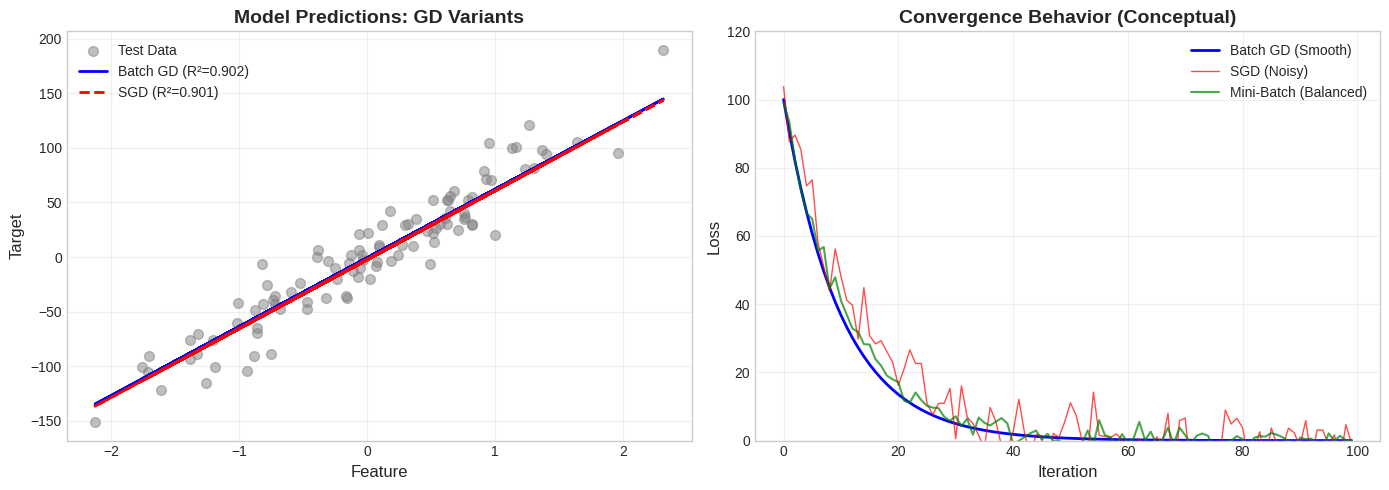

In [7]:
# ============================================================
# DEMONSTRATION: BATCH vs STOCHASTIC GRADIENT DESCENT
# Comparing convergence behavior of different GD variants
# ============================================================

from sklearn.linear_model import SGDRegressor

# Generate synthetic data
X_gd, y_gd = make_regression(n_samples=500, n_features=1, noise=20, random_state=RANDOM_STATE)
X_train_gd, X_test_gd, y_train_gd, y_test_gd = train_test_split(
    X_gd, y_gd, test_size=0.2, random_state=RANDOM_STATE
)

# Batch Gradient Descent (via scikit-learn LinearRegression)
model_batch = LinearRegression()
model_batch.fit(X_train_gd, y_train_gd)
score_batch = model_batch.score(X_test_gd, y_test_gd)

# Stochastic Gradient Descent
model_sgd = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant', 
                         random_state=RANDOM_STATE)
model_sgd.fit(X_train_gd, y_train_gd)
score_sgd = model_sgd.score(X_test_gd, y_test_gd)

# Mini-Batch Gradient Descent (SGD with larger batches internally)
model_minibatch = SGDRegressor(max_iter=1000, eta0=0.01, learning_rate='constant',
                               random_state=RANDOM_STATE)
model_minibatch.partial_fit(X_train_gd, y_train_gd)  # Can update incrementally
score_minibatch = model_minibatch.score(X_test_gd, y_test_gd)

# Comparison table
print("="*60)
print("GRADIENT DESCENT VARIANTS COMPARISON")
print("="*60)
print(f"Batch GD       - Test R²: {score_batch:.4f}")
print(f"Stochastic GD  - Test R²: {score_sgd:.4f}")
print(f"Mini-Batch GD  - Test R²: {score_minibatch:.4f}")
print("="*60)
print("\nNote: All variants converge to similar solutions for convex problems.")
print("Differences appear in: convergence speed, memory usage, and noise level.")
print("="*60)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Learned models
axes[0].scatter(X_test_gd, y_test_gd, c='gray', alpha=0.5, s=50, label='Test Data')
axes[0].plot(X_test_gd, model_batch.predict(X_test_gd), 'b-', linewidth=2, 
             label=f'Batch GD (R²={score_batch:.3f})')
axes[0].plot(X_test_gd, model_sgd.predict(X_test_gd), 'r--', linewidth=2,
             label=f'SGD (R²={score_sgd:.3f})')
axes[0].set_xlabel('Feature', fontsize=12)
axes[0].set_ylabel('Target', fontsize=12)
axes[0].set_title('Model Predictions: GD Variants', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Conceptual convergence paths
iterations = np.arange(0, 100)
batch_loss = 100 * np.exp(-0.1 * iterations)  # Smooth exponential decay
sgd_loss = 100 * np.exp(-0.08 * iterations) + np.random.randn(100) * 5  # Noisy
minibatch_loss = 100 * np.exp(-0.09 * iterations) + np.random.randn(100) * 2  # Less noisy

axes[1].plot(iterations, batch_loss, 'b-', linewidth=2, label='Batch GD (Smooth)')
axes[1].plot(iterations, sgd_loss, 'r-', linewidth=1, alpha=0.7, label='SGD (Noisy)')
axes[1].plot(iterations, minibatch_loss, 'g-', linewidth=1.5, alpha=0.7, label='Mini-Batch (Balanced)')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].set_title('Convergence Behavior (Conceptual)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 120)

plt.tight_layout()
plt.show()

## 7. Bias-Variance Tradeoff

The bias-variance tradeoff is one of the most fundamental concepts in machine learning. It explains why models fail and guides decisions about model complexity, regularization, and data requirements.

---

### 7.1 Understanding Prediction Error

**Total Prediction Error Decomposition:**

Every model's prediction error can be decomposed into three components:
```
Total Error = Bias² + Variance + Irreducible Error
```

| Component | Description | Source |
|-----------|-------------|--------|
| **Bias** | Error from wrong assumptions in the learning algorithm | Model underfitting |
| **Variance** | Error from sensitivity to training data fluctuations | Model overfitting |
| **Irreducible Error** | Noise inherent in the problem (cannot be reduced) | Data noise, measurement errors |

**Mathematical Representation:**
```
E[(y - ŷ)²] = Bias[ŷ]² + Var[ŷ] + σ²

where:
- E[·]: Expected value over all possible training sets
- y: True target value
- ŷ: Model prediction
- σ²: Irreducible error (noise variance)
```

---

### 7.2 Bias: Error from Wrong Assumptions

**Definition:** Bias measures how far off the model's average predictions are from the true values, even with infinite training data.

**Characteristics:**

| Aspect | Description |
|--------|-------------|
| **Cause** | Oversimplified model assumptions |
| **Symptom** | Model consistently misses the true pattern |
| **Training Error** | High |
| **Test Error** | High |
| **Pattern** | Similar errors on both training and test sets |

**High Bias Models (Underfitting):**

Models that are too simple to capture the underlying data structure.

**Examples:**

| Model | Problem | Result |
|-------|---------|--------|
| Linear model on non-linear data | Cannot capture curves | Systematic errors |
| Shallow decision tree on complex data | Cannot capture interactions | Oversimplified rules |
| Low-degree polynomial | Cannot fit high-order patterns | Smooth but wrong predictions |

**Visual Indicators of High Bias:**
```
Training Data: Complex non-linear pattern
Model: Simple linear line

Result:
- Training error: High (model doesn't fit training data well)
- Test error: High (model doesn't fit test data well)
- Gap between train and test error: Small
```

**How to Detect High Bias:**

✅ **Diagnostic Signals:**
- Training error is unacceptably high
- Training and test errors are similar (small gap)
- Model predictions look too simple/smooth
- Learning curves: both train and test errors plateau at high values

---

### 7.3 Variance: Error from Data Sensitivity

**Definition:** Variance measures how much model predictions change when trained on different training sets sampled from the same distribution.

**Characteristics:**

| Aspect | Description |
|--------|-------------|
| **Cause** | Model is too complex, learns noise |
| **Symptom** | Model changes drastically with small data changes |
| **Training Error** | Low (fits training data very well) |
| **Test Error** | High (fails to generalize) |
| **Pattern** | Large gap between training and test errors |

**High Variance Models (Overfitting):**

Models that memorize training data rather than learning generalizable patterns.

**Examples:**

| Model | Problem | Result |
|-------|---------|--------|
| High-degree polynomial | Fits noise in training data | Extreme oscillations |
| Deep decision tree | Memorizes individual samples | Complex, non-generalizable rules |
| kNN with k=1 | Every training point is perfect | No smoothing, sensitive to noise |
| Neural network with too many parameters | Memorizes training examples | Poor generalization |

**Visual Indicators of High Variance:**
```
Training Data: Simple pattern with noise
Model: Complex curve through every point

Result:
- Training error: Very low (nearly perfect fit)
- Test error: High (fails on new data)
- Gap between train and test error: Large
```

**How to Detect High Variance:**

✅ **Diagnostic Signals:**
- Training error is very low, but test error is high
- Large gap between training and test errors
- Model predictions show extreme complexity (wiggles, oscillations)
- Learning curves: training error low, validation error high with large gap

---

### 7.4 The Tradeoff

**Core Principle:** Reducing bias typically increases variance, and vice versa. The goal is to find the optimal balance.

**The Tradeoff Curve:**
```
Error
  ↑
  |        Bias²
  |       /
  |      /  Total Error
  |     /   /
  |    /   /
  |   /   /  Variance
  |  /___/___/
  | /       \
  |/         \___________
  +------------------------→ Model Complexity
Simple                  Complex
(High Bias)          (High Variance)
```

**Model Complexity Spectrum:**

| Model Complexity | Bias | Variance | Training Error | Test Error | Description |
|------------------|------|----------|----------------|------------|-------------|
| **Too Simple** | High | Low | High | High | Underfitting - misses patterns |
| **Optimal** | Medium | Medium | Medium | Medium | Sweet spot - generalizes well |
| **Too Complex** | Low | High | Low | High | Overfitting - memorizes noise |

---

### 7.5 Underfitting vs Overfitting

#### 7.5.1 Underfitting (High Bias)

**Definition:** Model is too simple to capture the underlying structure of the data.

**Symptoms:**

| Indicator | Observation |
|-----------|-------------|
| **Training Performance** | Poor (high error) |
| **Test Performance** | Poor (high error) |
| **Error Gap** | Small (train ≈ test) |
| **Prediction Pattern** | Too smooth, misses trends |
| **Learning Curve** | Errors plateau at high values |

**Causes:**

1. Model architecture too simple (e.g., linear model for non-linear data)
2. Insufficient features (missing important predictors)
3. Over-regularization (too strong penalty on complexity)
4. Insufficient training iterations (early stopping too early)

**Solutions:**

| Strategy | How it Helps |
|----------|--------------|
| **Increase model complexity** | Use more flexible model (polynomial, tree-based) |
| **Add features** | Include interactions, polynomial terms |
| **Reduce regularization** | Lower λ in Ridge/Lasso |
| **Train longer** | More epochs/iterations |
| **Remove constraints** | Increase tree depth, reduce pruning |

---

#### 7.5.2 Overfitting (High Variance)

**Definition:** Model learns training data too well, including noise and outliers, failing to generalize to new data.

**Symptoms:**

| Indicator | Observation |
|-----------|-------------|
| **Training Performance** | Excellent (very low error) |
| **Test Performance** | Poor (high error) |
| **Error Gap** | Large (train << test) |
| **Prediction Pattern** | Too complex, erratic oscillations |
| **Learning Curve** | Training error very low, validation error high |

**Causes:**

1. Model architecture too complex (e.g., high-degree polynomial)
2. Too many features relative to samples (curse of dimensionality)
3. Insufficient regularization (no penalty on complexity)
4. Too many training iterations (memorization occurs)
5. Small training dataset (insufficient data to learn generalizable patterns)

**Solutions:**

| Strategy | How it Helps |
|----------|--------------|
| **Simplify model** | Use less flexible model (lower degree, shallower tree) |
| **Regularization** | Add L1/L2 penalties (Ridge, Lasso, ElasticNet) |
| **More training data** | Helps model learn true pattern vs noise |
| **Feature selection** | Remove irrelevant/redundant features |
| **Cross-validation** | Better estimate of generalization performance |
| **Early stopping** | Stop training when validation error increases |
| **Ensemble methods** | Average predictions to reduce variance |
| **Dropout (neural nets)** | Randomly disable neurons during training |

---

### 7.6 Comparison Table: Underfitting vs Overfitting

| Aspect | Underfitting | Optimal Fit | Overfitting |
|--------|--------------|-------------|-------------|
| **Bias** | High | Medium | Low |
| **Variance** | Low | Medium | High |
| **Training Error** | High | Medium | Very Low |
| **Test Error** | High | Medium | High |
| **Error Gap** | Small | Small | Large |
| **Model Complexity** | Too simple | Just right | Too complex |
| **Generalization** | Poor | Good | Poor |
| **Problem** | Misses patterns | Balanced | Memorizes noise |
| **Visual Pattern** | Too smooth | Captures trend | Too wiggly |
| **Primary Issue** | Model capacity | None | Model capacity |

---

### 7.7 Learning Curves: Diagnosing Bias and Variance

**Definition:** Learning curves plot model performance (error or accuracy) as a function of training set size.

**Typical Learning Curve Structure:**
```
Error
  ↑
  |  
  |  Test Error ────────
  |              \
  |               \____
  |                    \____
  |  Train Error           \____
  |         /                   \____
  |        /________________________▁▁▁
  +----------------------------------------→ Training Set Size
  Small                              Large
```

**Interpreting Learning Curves:**

#### Pattern 1: High Bias (Underfitting)
```
Error
  ↑
  |  
  |  Test  ─────────────────
  |  Train ─────────────────
  |        (both high, small gap)
  +------------------------→ Training Size
```

**Characteristics:**
- Both curves plateau at high error
- Small gap between training and test error
- Adding more data doesn't help

**Diagnosis:** Model is too simple

**Solution:** Increase model complexity

---

#### Pattern 2: High Variance (Overfitting)
```
Error
  ↑
  |  Test  ─────────────
  |                \
  |                 \____
  |  Train              \____
  |         ____________________
  +------------------------→ Training Size
```

**Characteristics:**
- Large gap between training and test error
- Training error very low
- Test error much higher
- Gap decreases with more data

**Diagnosis:** Model is too complex

**Solution:** Simplify model or add regularization or collect more data

---

#### Pattern 3: Good Fit (Optimal)
```
Error
  ↑
  |  
  |  Test  ────
  |           \
  |            \___
  |  Train        \___
  |         ____      \___
  +------------------------→ Training Size
```

**Characteristics:**
- Small gap between curves
- Both errors acceptably low
- Curves converge

**Diagnosis:** Model complexity is appropriate

**Action:** Model is ready for deployment

---

### 7.8 Model Complexity and its Effects

**Model Complexity Factors:**

| Model Type | Complexity Controlled By |
|------------|--------------------------|
| **Linear Regression** | Number of features, polynomial degree |
| **Ridge/Lasso** | Regularization parameter λ (higher λ = simpler) |
| **Decision Tree** | Max depth, min samples per leaf |
| **Random Forest** | Number of trees, tree depth |
| **Neural Network** | Number of layers, neurons per layer |
| **kNN** | k value (smaller k = more complex) |
| **SVM** | Kernel type, C parameter, gamma |

**Complexity vs Error Visualization:**
```
Error
  ↑
  |     Underfitting  |  Optimal  | Overfitting
  |                   |           |
  |  Test Error ──────┐           │
  |                   │\          │
  |                   │ \         │    /
  |                   │  \        │   /
  |                   │   \       │  /
  |  Train Error      │    \_____│_/
  |      _____________│          │
  +──────────────────────────────────→ Model Complexity
             Low         Sweet Spot      High
```

---

### 7.9 Strategies for Managing Bias-Variance Tradeoff

#### Reducing Bias (When Underfitting):

| Strategy | Implementation | When to Use |
|----------|----------------|-------------|
| **Add polynomial features** | `PolynomialFeatures(degree=n)` | Data has non-linear patterns |
| **Increase tree depth** | `max_depth=None` or larger value | Tree-based models too shallow |
| **Use more complex model** | Switch from linear to non-linear | Current model too restrictive |
| **Add interaction terms** | `X1 * X2`, `X1 * X2 * X3` | Features have multiplicative effects |
| **Reduce regularization** | Lower λ in Ridge/Lasso | Model is over-constrained |
| **Train longer** | More epochs | Model hasn't converged |

#### Reducing Variance (When Overfitting):

| Strategy | Implementation | When to Use |
|----------|----------------|-------------|
| **Collect more data** | Increase training set size | Most effective solution if possible |
| **Feature selection** | Remove low-importance features | Too many irrelevant features |
| **Regularization** | Add L1/L2 penalties | Model has too many parameters |
| **Reduce tree depth** | Lower `max_depth` | Decision trees too complex |
| **Increase k in kNN** | Larger k value | kNN predictions too sensitive |
| **Early stopping** | Stop when validation error increases | Neural networks, boosting |
| **Ensemble methods** | Bagging, Random Forest | Reduce variance of single models |
| **Cross-validation** | k-fold CV | Better generalization estimates |
| **Dropout** | Neural network regularization | Deep learning overfitting |

---

### 7.10 Practical Guidelines

**When to Worry About Bias:**

✅ Check for high bias when:
- Training error is unacceptably high
- Model performance is poor even on training data
- Model predictions look too simple
- Learning curves plateau at high error
- Domain experts say model misses obvious patterns

**When to Worry About Variance:**

✅ Check for high variance when:
- Training error is low but test error is high
- Large gap between train and test performance
- Model predictions are erratic or overly complex
- Performance varies greatly across different train/test splits
- Adding more training data significantly improves test performance

---

### 7.11 The Role of Training Data Size

**Impact of Data Size on Bias-Variance:**

| Data Size | Bias | Variance | Overfitting Risk | Recommendation |
|-----------|------|----------|------------------|----------------|
| **Very Small (< 100)** | High | Very High | Critical | Use simple models, heavy regularization |
| **Small (100-1K)** | Medium | High | High | Cross-validation essential, moderate complexity |
| **Medium (1K-100K)** | Low | Medium | Medium | Standard approaches work |
| **Large (> 100K)** | Low | Low | Low | Can use complex models, less regularization needed |

**General Principle:**
```
More data → Lower variance → Can use more complex models
Less data → Higher variance → Must use simpler models
```

---

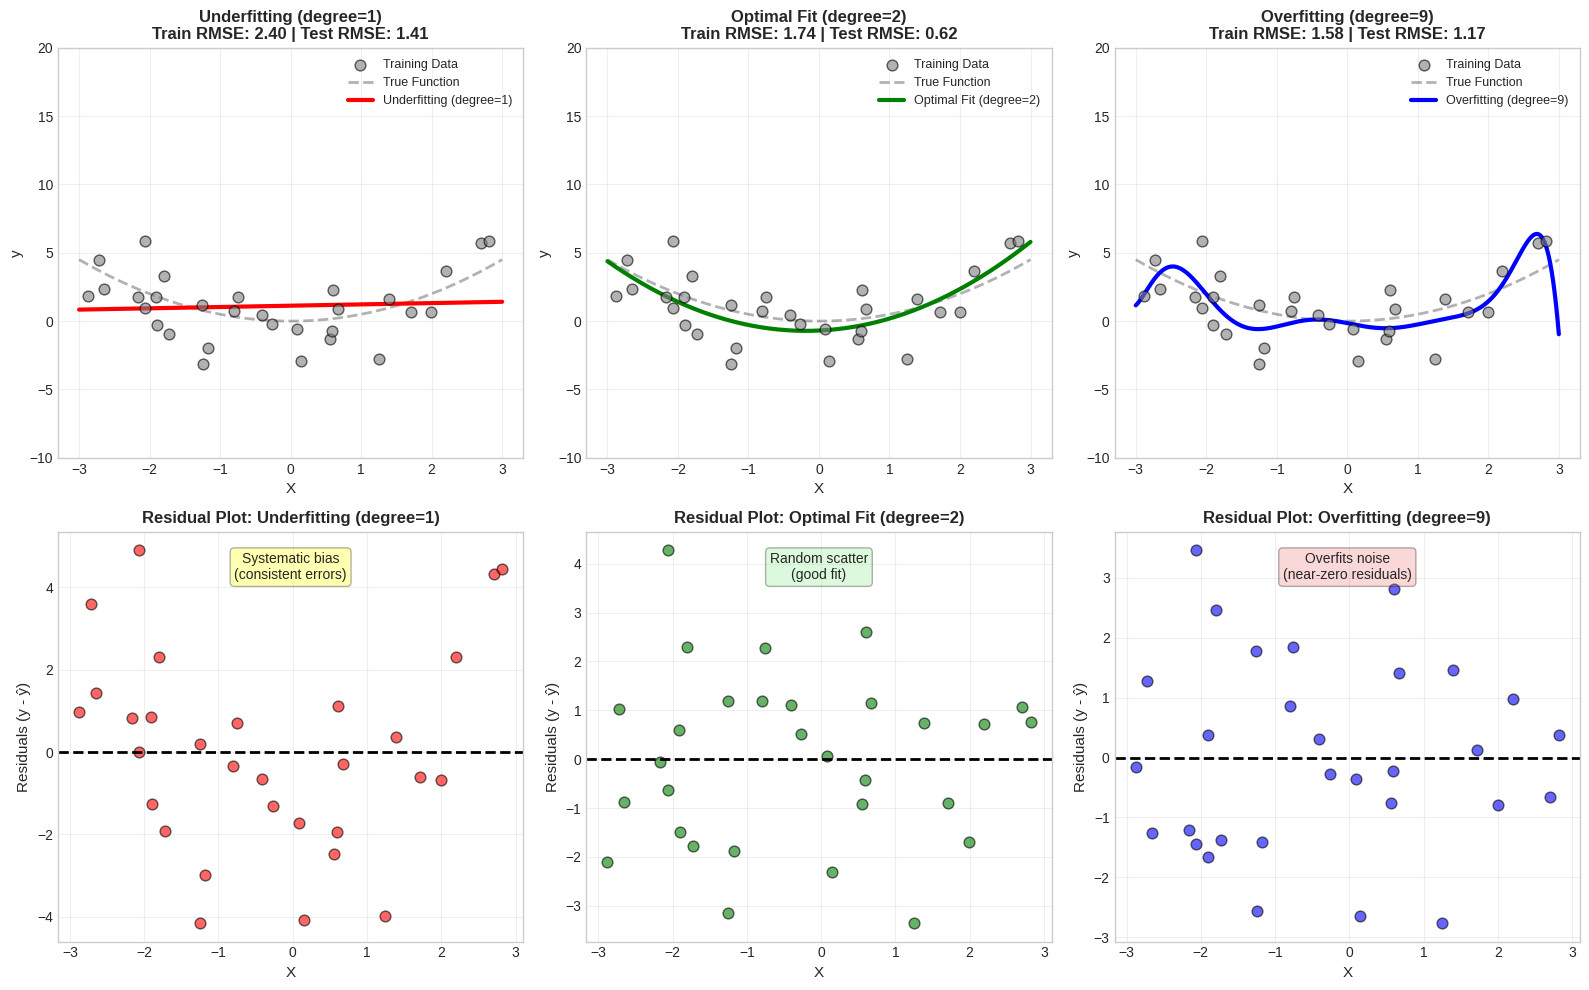

BIAS-VARIANCE TRADEOFF ANALYSIS

Model                          Train RMSE   Test RMSE    Diagnosis
----------------------------------------------------------------------
Degree 1 (Linear)              2.40         1.41         High Bias
Degree 2 (Quadratic)           1.74         0.62         Optimal
Degree 9 (High Polynomial)     1.58         1.17         High Variance


In [8]:
# ============================================================
# VISUALIZATION: POLYNOMIAL REGRESSION - BIAS-VARIANCE SPECTRUM
# Demonstrating underfitting, optimal fit, and overfitting
# ============================================================

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data with non-linear pattern
np.random.seed(RANDOM_STATE)
n_samples = 30
X_poly = np.sort(np.random.uniform(-3, 3, n_samples)).reshape(-1, 1)
y_poly = 0.5 * X_poly.ravel()**2 + np.random.randn(n_samples) * 2

# Create models with different complexities
degrees = [1, 2, 9]  # Underfitting, Optimal, Overfitting
model_names = ['Underfitting (degree=1)', 'Optimal Fit (degree=2)', 'Overfitting (degree=9)']
colors = ['red', 'green', 'blue']

# Generate fine-grained x values for smooth prediction curves
X_test_poly = np.linspace(-3, 3, 300).reshape(-1, 1)

# Train models and calculate errors
train_errors = []
test_errors = []
models = []

for degree in degrees:
    # Create polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_poly, y_poly)
    models.append(model)
    
    # Calculate training error
    y_pred_train = model.predict(X_poly)
    train_rmse = np.sqrt(mean_squared_error(y_poly, y_pred_train))
    train_errors.append(train_rmse)
    
    # Calculate test error (on true function without noise)
    y_true_test = 0.5 * X_test_poly.ravel()**2
    y_pred_test = model.predict(X_test_poly)
    test_rmse = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    test_errors.append(test_rmse)

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Plot each model
for idx, (degree, name, color) in enumerate(zip(degrees, model_names, colors)):
    ax = axes[0, idx]
    
    # Plot training data
    ax.scatter(X_poly, y_poly, c='gray', s=60, alpha=0.6, edgecolor='k', 
               label='Training Data', zorder=3)
    
    # Plot true function (without noise)
    y_true = 0.5 * X_test_poly.ravel()**2
    ax.plot(X_test_poly, y_true, 'k--', linewidth=2, alpha=0.3, 
            label='True Function', zorder=1)
    
    # Plot model predictions
    y_pred = models[idx].predict(X_test_poly)
    ax.plot(X_test_poly, y_pred, color=color, linewidth=3, 
            label=f'{name}', zorder=2)
    
    ax.set_xlabel('X', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title(f'{name}\nTrain RMSE: {train_errors[idx]:.2f} | Test RMSE: {test_errors[idx]:.2f}',
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-10, 20)

# Residual plots (showing prediction errors)
for idx, (degree, name, color) in enumerate(zip(degrees, model_names, colors)):
    ax = axes[1, idx]
    
    # Calculate residuals on training data
    y_pred_train = models[idx].predict(X_poly)
    residuals = y_poly - y_pred_train
    
    # Plot residuals
    ax.scatter(X_poly, residuals, c=color, s=60, alpha=0.6, edgecolor='k')
    ax.axhline(y=0, color='black', linestyle='--', linewidth=2)
    
    ax.set_xlabel('X', fontsize=11)
    ax.set_ylabel('Residuals (y - ŷ)', fontsize=11)
    ax.set_title(f'Residual Plot: {name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add annotation
    if idx == 0:
        ax.text(0.5, 0.95, 'Systematic bias\n(consistent errors)', 
                transform=ax.transAxes, fontsize=10, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
    elif idx == 1:
        ax.text(0.5, 0.95, 'Random scatter\n(good fit)', 
                transform=ax.transAxes, fontsize=10, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
    else:
        ax.text(0.5, 0.95, 'Overfits noise\n(near-zero residuals)', 
                transform=ax.transAxes, fontsize=10, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))

plt.tight_layout()
plt.show()

print("="*70)
print("BIAS-VARIANCE TRADEOFF ANALYSIS")
print("="*70)
print(f"\n{'Model':<30} {'Train RMSE':<12} {'Test RMSE':<12} {'Diagnosis'}")
print("-"*70)
print(f"{'Degree 1 (Linear)':<30} {train_errors[0]:<12.2f} {test_errors[0]:<12.2f} High Bias")
print(f"{'Degree 2 (Quadratic)':<30} {train_errors[1]:<12.2f} {test_errors[1]:<12.2f} Optimal")
print(f"{'Degree 9 (High Polynomial)':<30} {train_errors[2]:<12.2f} {test_errors[2]:<12.2f} High Variance")
print("="*70)

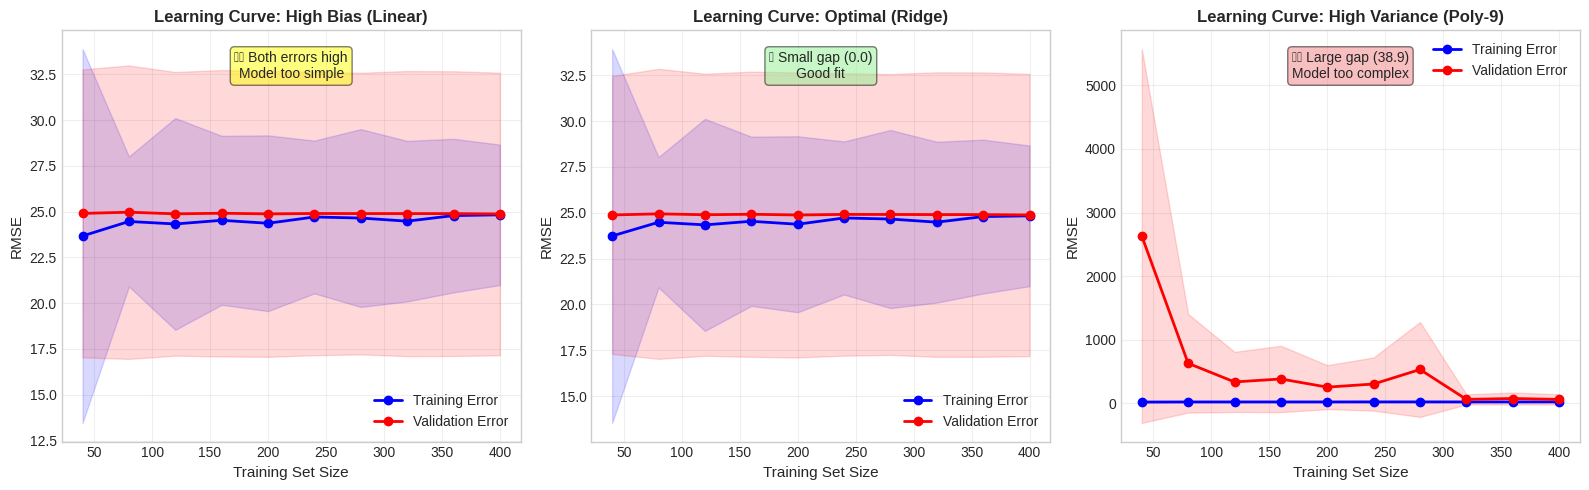


LEARNING CURVE INTERPRETATION

High Bias (Underfitting):
  - Both training and validation errors are high
  - Errors converge but at unacceptable level
  - Solution: Increase model complexity

Optimal Fit:
  - Small gap between training and validation errors
  - Both errors are acceptably low
  - Solution: Model is ready

High Variance (Overfitting):
  - Training error is low, validation error is high
  - Large gap between the two curves
  - Solution: Simplify model, add regularization, or get more data


In [9]:
# ============================================================
# VISUALIZATION: LEARNING CURVES FOR BIAS-VARIANCE DIAGNOSIS
# Showing how training/validation errors change with data size
# ============================================================

# Generate larger dataset for learning curve analysis
X_lc, y_lc = make_regression(n_samples=500, n_features=1, noise=25, random_state=RANDOM_STATE)

# Define three models with different complexities
models_lc = {
    'High Bias (Linear)': LinearRegression(),
    'Optimal (Ridge)': Ridge(alpha=1.0),
    'High Variance (Poly-9)': make_pipeline(PolynomialFeatures(9), LinearRegression())
}

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (name, model) in enumerate(models_lc.items()):
    ax = axes[idx]
    
    # Calculate learning curves
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_lc, y_lc,
        cv=5,
        scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1,
        random_state=RANDOM_STATE
    )
    
    # Convert to RMSE (positive values)
    train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
    train_scores_std = np.sqrt(train_scores.std(axis=1))
    val_scores_mean = np.sqrt(-val_scores.mean(axis=1))
    val_scores_std = np.sqrt(val_scores.std(axis=1))
    
    # Plot learning curves
    ax.plot(train_sizes, train_scores_mean, 'o-', color='blue', linewidth=2,
            markersize=6, label='Training Error')
    ax.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.15, color='blue')
    
    ax.plot(train_sizes, val_scores_mean, 'o-', color='red', linewidth=2,
            markersize=6, label='Validation Error')
    ax.fill_between(train_sizes,
                     val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std,
                     alpha=0.15, color='red')
    
    ax.set_xlabel('Training Set Size', fontsize=11)
    ax.set_ylabel('RMSE', fontsize=11)
    ax.set_title(f'Learning Curve: {name}', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Add diagnostic annotations
    final_gap = val_scores_mean[-1] - train_scores_mean[-1]
    
    if 'High Bias' in name:
        ax.text(0.5, 0.95, '⚠️ Both errors high\nModel too simple',
                transform=ax.transAxes, fontsize=10, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    elif 'High Variance' in name:
        ax.text(0.5, 0.95, f'⚠️ Large gap ({final_gap:.1f})\nModel too complex',
                transform=ax.transAxes, fontsize=10, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))
    else:
        ax.text(0.5, 0.95, f'✅ Small gap ({final_gap:.1f})\nGood fit',
                transform=ax.transAxes, fontsize=10, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("LEARNING CURVE INTERPRETATION")
print("="*70)
print("\nHigh Bias (Underfitting):")
print("  - Both training and validation errors are high")
print("  - Errors converge but at unacceptable level")
print("  - Solution: Increase model complexity")
print("\nOptimal Fit:")
print("  - Small gap between training and validation errors")
print("  - Both errors are acceptably low")
print("  - Solution: Model is ready")
print("\nHigh Variance (Overfitting):")
print("  - Training error is low, validation error is high")
print("  - Large gap between the two curves")
print("  - Solution: Simplify model, add regularization, or get more data")
print("="*70)

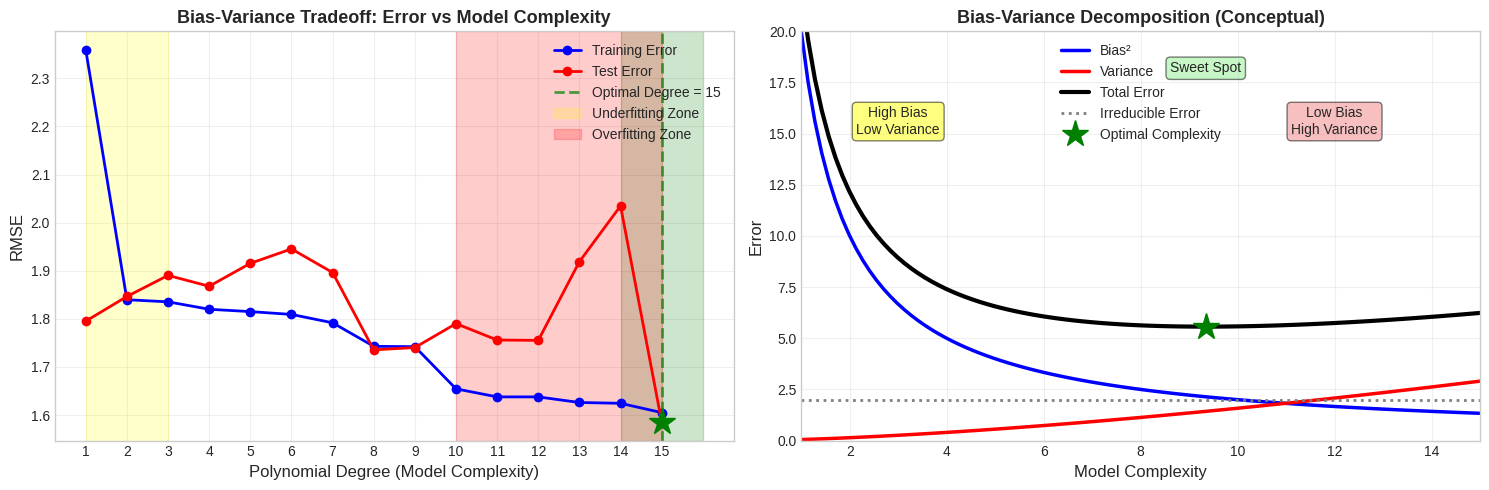


MODEL COMPLEXITY ANALYSIS

Optimal polynomial degree: 15
Minimum test error: 1.59

Training error at optimal: 1.61
Test error at optimal: 1.59
Error gap: -0.02

Key Insight:
  - Low complexity (degree 1-2): High bias, both errors high
  - Optimal complexity (degree 15): Balanced, lowest test error
  - High complexity (degree 10+): High variance, large train-test gap


In [10]:
# ============================================================
# DEMONSTRATION: MODEL COMPLEXITY VS ERROR
# Visualizing the bias-variance tradeoff across model complexity spectrum
# ============================================================

# Generate data
np.random.seed(RANDOM_STATE)
X_complex = np.sort(np.random.uniform(-3, 3, 50)).reshape(-1, 1)
y_complex = 0.5 * X_complex.ravel()**2 + np.random.randn(50) * 2

# Split into train and test
X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(
    X_complex, y_complex, test_size=0.3, random_state=RANDOM_STATE
)

# Test different polynomial degrees (complexity levels)
degrees_range = range(1, 16)
train_errors_complex = []
test_errors_complex = []

for degree in degrees_range:
    # Create and train model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_complex, y_train_complex)
    
    # Calculate errors
    y_train_pred = model.predict(X_train_complex)
    y_test_pred = model.predict(X_test_complex)
    
    train_rmse = np.sqrt(mean_squared_error(y_train_complex, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_complex, y_test_pred))
    
    train_errors_complex.append(train_rmse)
    test_errors_complex.append(test_rmse)

# Find optimal complexity
optimal_degree = degrees_range[np.argmin(test_errors_complex)]
min_test_error = min(test_errors_complex)

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Error vs Model Complexity
ax1 = axes[0]
ax1.plot(degrees_range, train_errors_complex, 'o-', color='blue', linewidth=2,
         markersize=6, label='Training Error')
ax1.plot(degrees_range, test_errors_complex, 'o-', color='red', linewidth=2,
         markersize=6, label='Test Error')

# Mark optimal point
ax1.axvline(x=optimal_degree, color='green', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Optimal Degree = {optimal_degree}')
ax1.plot(optimal_degree, min_test_error, 'g*', markersize=20, zorder=5)

# Annotate regions
ax1.axvspan(1, 3, alpha=0.2, color='yellow', label='Underfitting Zone')
ax1.axvspan(optimal_degree-1, optimal_degree+1, alpha=0.2, color='green')
ax1.axvspan(10, 15, alpha=0.2, color='red', label='Overfitting Zone')

ax1.set_xlabel('Polynomial Degree (Model Complexity)', fontsize=12)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_title('Bias-Variance Tradeoff: Error vs Model Complexity', 
              fontsize=13, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(degrees_range)

# Plot 2: Bias-Variance Decomposition (Conceptual)
ax2 = axes[1]
complexity_axis = np.linspace(1, 15, 100)

# Simulate bias, variance, and total error curves
bias_squared = 20 / complexity_axis  # Decreases with complexity
variance = 0.05 * complexity_axis**1.5  # Increases with complexity
irreducible_error = 2  # Constant
total_error = bias_squared + variance + irreducible_error

ax2.plot(complexity_axis, bias_squared, 'b-', linewidth=2.5, label='Bias²')
ax2.plot(complexity_axis, variance, 'r-', linewidth=2.5, label='Variance')
ax2.plot(complexity_axis, total_error, 'k-', linewidth=3, label='Total Error')
ax2.axhline(y=irreducible_error, color='gray', linestyle=':', linewidth=2,
            label='Irreducible Error')

# Mark optimal point
optimal_idx = np.argmin(total_error)
ax2.plot(complexity_axis[optimal_idx], total_error[optimal_idx], 
         'g*', markersize=20, zorder=5, label='Optimal Complexity')

ax2.set_xlabel('Model Complexity', fontsize=12)
ax2.set_ylabel('Error', fontsize=12)
ax2.set_title('Bias-Variance Decomposition (Conceptual)', 
              fontsize=13, fontweight='bold')
ax2.legend(loc='upper center', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(1, 15)
ax2.set_ylim(0, 20)

# Annotate regions
ax2.text(3, 15, 'High Bias\nLow Variance', fontsize=10, ha='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
ax2.text(complexity_axis[optimal_idx], 18, 'Sweet Spot', fontsize=10, ha='center',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
ax2.text(12, 15, 'Low Bias\nHigh Variance', fontsize=10, ha='center',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("MODEL COMPLEXITY ANALYSIS")
print("="*70)
print(f"\nOptimal polynomial degree: {optimal_degree}")
print(f"Minimum test error: {min_test_error:.2f}")
print(f"\nTraining error at optimal: {train_errors_complex[optimal_degree-1]:.2f}")
print(f"Test error at optimal: {test_errors_complex[optimal_degree-1]:.2f}")
print(f"Error gap: {test_errors_complex[optimal_degree-1] - train_errors_complex[optimal_degree-1]:.2f}")
print("\nKey Insight:")
print("  - Low complexity (degree 1-2): High bias, both errors high")
print(f"  - Optimal complexity (degree {optimal_degree}): Balanced, lowest test error")
print("  - High complexity (degree 10+): High variance, large train-test gap")
print("="*70)

In [11]:
# ============================================================
# INTERACTIVE COMPARISON: UNDERFITTING VS OPTIMAL VS OVERFITTING
# Side-by-side comparison with detailed metrics
# ============================================================

# Use previously trained models from CODE CELL 8
comparison_data = []

for idx, (degree, name) in enumerate(zip(degrees, model_names)):
    # Get model
    model = models[idx]
    
    # Training metrics
    y_pred_train = model.predict(X_poly)
    train_rmse = np.sqrt(mean_squared_error(y_poly, y_pred_train))
    train_r2 = r2_score(y_poly, y_pred_train)
    
    # Test metrics (on true function)
    y_true_test = 0.5 * X_test_poly.ravel()**2
    y_pred_test = model.predict(X_test_poly)
    test_rmse = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    test_r2 = r2_score(y_true_test, y_pred_test)
    
    # Calculate error gap
    error_gap = test_rmse - train_rmse
    
    comparison_data.append({
        'Model': name,
        'Degree': degree,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Error_Gap': error_gap,
        'Diagnosis': ['High Bias', 'Optimal Fit', 'High Variance'][idx]
    })

# Create comparison dataframe
df_comparison = pd.DataFrame(comparison_data)

print("\n" + "="*90)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*90)
print(df_comparison.to_string(index=False))
print("="*90)

print("\n📊 Interpretation Guide:")
print("-" * 90)
print("\nUnderfitting (High Bias):")
print("  ✗ Training RMSE: High (model doesn't fit training data well)")
print("  ✗ Test RMSE: High (model doesn't generalize)")
print("  ✓ Error Gap: Small (consistent performance, but consistently bad)")
print("  → Solution: Increase model complexity")

print("\nOptimal Fit:")
print("  ✓ Training RMSE: Moderate (fits training data reasonably)")
print("  ✓ Test RMSE: Low (generalizes well)")
print("  ✓ Error Gap: Small (stable performance)")
print("  → Solution: Model is ready for deployment")

print("\nOverfitting (High Variance):")
print("  ✓ Training RMSE: Very Low (fits training data too well)")
print("  ✗ Test RMSE: High (fails to generalize)")
print("  ✗ Error Gap: Large (unstable, memorized noise)")
print("  → Solution: Reduce complexity, add regularization, get more data")
print("="*90)


COMPREHENSIVE MODEL COMPARISON
                  Model  Degree  Train_RMSE  Test_RMSE  Train_R2   Test_R2  Error_Gap     Diagnosis
Underfitting (degree=1)       1    2.397043   1.413707  0.004382 -0.095645  -0.983336     High Bias
 Optimal Fit (degree=2)       2    1.742372   0.619729  0.473954  0.789450  -1.122643   Optimal Fit
 Overfitting (degree=9)       9    1.584037   1.167514  0.565218  0.252733  -0.416523 High Variance

📊 Interpretation Guide:
------------------------------------------------------------------------------------------

Underfitting (High Bias):
  ✗ Training RMSE: High (model doesn't fit training data well)
  ✗ Test RMSE: High (model doesn't generalize)
  ✓ Error Gap: Small (consistent performance, but consistently bad)
  → Solution: Increase model complexity

Optimal Fit:
  ✓ Training RMSE: Moderate (fits training data reasonably)
  ✓ Test RMSE: Low (generalizes well)
  ✓ Error Gap: Small (stable performance)
  → Solution: Model is ready for deployment

Overfitt

## 8. Curse of Dimensionality

The curse of dimensionality refers to various phenomena that arise when analyzing data in high-dimensional spaces. As the number of features increases, the volume of the space increases exponentially, making data increasingly sparse and distance-based methods less effective.

---

### 8.1 What is Dimensionality?

**Definition:** Dimensionality is the number of features (variables) in a dataset. Each feature represents one dimension in the feature space.

**Dimensionality Examples:**

| Dataset | Features | Dimensionality | Feature Space |
|---------|----------|----------------|---------------|
| House price | Area, bedrooms, age | 3D | 3-dimensional space |
| Image (28×28 pixels) | 784 pixel values | 784D | 784-dimensional space |
| Text document (10K vocabulary) | 10,000 word counts | 10,000D | 10,000-dimensional space |
| Gene expression | 20,000 genes | 20,000D | 20,000-dimensional space |

**Visualization Limitations:**
```
1D: Line         ————————————
2D: Plane        ▢
3D: Cube         ▣
4D+: Cannot visualize directly
```

We can only directly visualize up to 3 dimensions. Beyond that, we rely on mathematical representations and projections.

---

### 8.2 The Curse: What Goes Wrong?

As dimensionality increases, several counterintuitive and problematic phenomena emerge:

#### Problem 1: Exponential Volume Growth

**Concept:** The volume of feature space grows exponentially with the number of dimensions.

**Example - Hypercube Volume:**

| Dimensions | Side Length = 1 | Volume = 1^d |
|------------|-----------------|--------------|
| 1D (line) | Length = 1 | 1 |
| 2D (square) | Area = 1×1 | 1 |
| 3D (cube) | Volume = 1×1×1 | 1 |
| dD (hypercube) | Hypervolume | 1 |

**Example - Hypersphere Volume:**

For a sphere of radius r=1:

| Dimensions | Formula | Volume |
|------------|---------|--------|
| 2D (circle) | πr² | 3.14 |
| 3D (sphere) | (4/3)πr³ | 4.19 |
| 10D | Complex formula | 2.55 |
| 100D | Complex formula | ~10⁻⁴⁰ (essentially 0!) |

**Key Insight:** In high dimensions, most of the volume is concentrated near the surface, not the center. This makes uniform sampling nearly impossible.

---

#### Problem 2: Data Sparsity

**Concept:** Fixed amount of data becomes increasingly sparse as dimensions increase.

**Thought Experiment:**

Suppose we want 10 samples per unit volume:

| Dimensions | Samples Needed for Same Density |
|------------|--------------------------------|
| 1D (0 to 1) | 10 samples |
| 2D (1×1 grid) | 100 samples (10²) |
| 3D (1×1×1 cube) | 1,000 samples (10³) |
| 10D | 10,000,000,000 samples (10¹⁰) |

**Reality Check:**
```
Typical dataset: 1,000 - 100,000 samples
High-dimensional space: 100 - 10,000 dimensions

Result: Data becomes extremely sparse
        Most of the space is empty
```

**Visualization:**
```
2D Space (10 samples):
○ ○     ○
    ○ ○
○     ○
  ○   ○ ○

10D Space (same 10 samples):
Samples occupy ~0.00000001% of space
Vast emptiness between points
```

---

#### Problem 3: Distance Concentration

**Concept:** In high dimensions, distances between all pairs of points become similar. The distinction between "near" and "far" loses meaning.

**Mathematical Result:**

As dimensions increase:
```
max_distance / min_distance → 1

All points become approximately equidistant!
```

**Example:**

| Dimensions | Min Distance | Max Distance | Ratio |
|------------|--------------|--------------|-------|
| 2D | 0.5 | 1.2 | 2.4 |
| 10D | 3.1 | 3.9 | 1.26 |
| 100D | 9.8 | 10.1 | 1.03 |
| 1000D | 31.5 | 31.7 | 1.006 |

**Impact on Distance-Based Methods:**

Distance-based algorithms (kNN, k-Means, SVM with RBF kernel) rely on meaningful distance metrics. When all distances are similar:

- **kNN:** Every point is equidistant, so neighbors are arbitrary
- **k-Means:** Cannot identify meaningful clusters
- **Density estimation:** All regions have similar density

---

#### Problem 4: Sample Size Requirements

**Hughes Phenomenon:** For a fixed number of training samples, there exists an optimal number of features that maximizes classification accuracy. Beyond this point, adding more features degrades performance.

**Empirical Rule:**
```
Minimum samples needed ≈ 10^d

where d = number of features
```

**Reality:**

| Features | Minimum Samples (Rule) | Typical Available |
|----------|------------------------|-------------------|
| 10 | 10¹⁰ (10 billion) | 10,000 |
| 100 | 10¹⁰⁰ (impossible!) | 100,000 |
| 1000 | 10¹⁰⁰⁰ (absurd!) | 1,000,000 |

This discrepancy is why dimensionality reduction and feature selection are crucial.

---

### 8.3 Which Models are Affected?

Not all algorithms are equally sensitive to high dimensionality:

#### Highly Sensitive to Curse of Dimensionality:

| Algorithm | Why It Struggles | Severity |
|-----------|------------------|----------|
| **k-Nearest Neighbors** | Relies on distance metrics that break down | ⚠️⚠️⚠️ Critical |
| **k-Means Clustering** | Distance-based, assumes compact clusters | ⚠️⚠️⚠️ Critical |
| **Gaussian Mixture Models** | Density estimation becomes unreliable | ⚠️⚠️⚠️ Critical |
| **SVM (RBF kernel)** | Distance-based kernel loses effectiveness | ⚠️⚠️ High |
| **Density-Based Clustering (DBSCAN)** | Density concept breaks down | ⚠️⚠️ High |

**Why:** These methods rely on distance metrics, density estimation, or neighborhood concepts that become meaningless in high dimensions.

---

#### Moderately Affected:

| Algorithm | Why It Copes Better | Severity |
|-----------|---------------------|----------|
| **Linear Models (Linear/Logistic Regression)** | Work in original space, no distance dependency | ⚠️ Moderate |
| **Neural Networks** | Learn representations, but need more data | ⚠️ Moderate |
| **Naive Bayes** | Independence assumption helps, but requires more samples | ⚠️ Moderate |

**Why:** These methods don't rely on distance metrics, but still suffer from sparsity and overfitting risks.

---

#### Relatively Robust:

| Algorithm | Why It Handles High Dimensions | Severity |
|-----------|-------------------------------|----------|
| **Decision Trees** | Axis-aligned splits, feature selection implicit | ✓ Low |
| **Random Forest** | Ensemble of trees, automatic feature selection | ✓ Low |
| **Gradient Boosting (XGBoost, LightGBM)** | Sequential feature importance weighting | ✓ Low |
| **Lasso Regression** | Built-in feature selection via L1 penalty | ✓ Low |

**Why:** These methods perform implicit feature selection or don't rely on global distance metrics.

---

### 8.4 Consequences of High Dimensionality

| Consequence | Description | Impact |
|-------------|-------------|--------|
| **Overfitting Risk** | More features than samples leads to perfect training fit | Model memorizes noise |
| **Computational Cost** | Distance calculations, matrix operations become expensive | Slow training/prediction |
| **Interpretability Loss** | Difficult to understand relationships in 100+ dimensions | Model becomes black box |
| **Visualization Impossible** | Cannot plot beyond 3D | Exploratory analysis harder |
| **Statistical Significance** | Need more samples for reliable estimates | P-values become unreliable |
| **Multicollinearity** | Features become correlated in high dimensions | Model instability |

---

### 8.5 Solutions to the Curse

#### Strategy 1: Feature Selection

**Goal:** Identify and keep only the most relevant features.

| Method | Description | When to Use |
|--------|-------------|-------------|
| **Variance Threshold** | Remove low-variance features | Many constant/near-constant features |
| **Correlation-Based** | Remove highly correlated features | Multicollinearity present |
| **Univariate Selection** | Statistical tests (chi-squared, ANOVA) | Need interpretable feature set |
| **Recursive Feature Elimination (RFE)** | Iteratively remove least important features | Tree-based or linear models |
| **L1 Regularization (Lasso)** | Automatic feature selection via penalty | Linear models, sparse solutions desired |
| **Tree-Based Importance** | Use Random Forest/XGBoost feature importance | Non-linear relationships |

---

#### Strategy 2: Dimensionality Reduction

**Goal:** Transform high-dimensional data into lower-dimensional representation while preserving information.

| Method | Type | Preserves | Use Case |
|--------|------|-----------|----------|
| **PCA** | Linear | Variance | General purpose, visualization |
| **LDA** | Linear | Class separability | Classification tasks |
| **t-SNE** | Non-linear | Local structure | Visualization only (2D/3D) |
| **UMAP** | Non-linear | Global + local structure | Visualization, preprocessing |
| **Autoencoders** | Non-linear | Learned representations | Deep learning, complex patterns |
| **Feature Agglomeration** | Clustering | Feature similarity | Related features exist |

---

#### Strategy 3: Regularization

**Goal:** Add penalties to model complexity to prevent overfitting in high dimensions.

| Technique | Penalty | Effect | Best For |
|-----------|---------|--------|----------|
| **Ridge (L2)** | Sum of squared coefficients | Shrinks all coefficients | Correlated features |
| **Lasso (L1)** | Sum of absolute coefficients | Sets some coefficients to zero | Feature selection |
| **ElasticNet** | L1 + L2 combination | Balanced approach | Both goals |
| **Dropout** | Random neuron deactivation | Reduces co-adaptation | Neural networks |

---

#### Strategy 4: Increase Sample Size

**Most Effective Solution:** Collect more training data.

**Sample-to-Feature Ratio Guidelines:**

| Ratio (samples/features) | Assessment | Action |
|--------------------------|------------|--------|
| < 1 | Critical underdetermination | Must reduce features or use extreme regularization |
| 1 - 5 | Severe overfitting risk | Strong dimensionality reduction needed |
| 5 - 10 | Moderate risk | Regularization recommended |
| 10 - 50 | Manageable | Standard approaches work |
| > 50 | Comfortable | Can use complex models |

---

#### Strategy 5: Use Robust Algorithms

**Preference Order in High Dimensions:**

1. **Tree-based ensembles** (Random Forest, XGBoost, LightGBM)
   - Implicit feature selection
   - Handle irrelevant features well

2. **Linear models with regularization** (Ridge, Lasso, ElasticNet)
   - Explicit control over complexity
   - Interpretable

3. **Neural networks with dropout/regularization**
   - Can learn complex patterns
   - Require more data

4. **Avoid:** kNN, k-Means, pure distance-based methods
   - Unless dimensionality reduction applied first

---

### 8.6 Practical Guidelines

**Red Flags for Curse of Dimensionality:**

✅ **Check for these warning signs:**
- Number of features > 10% of sample size
- Distance-based methods perform poorly
- Training accuracy is perfect (1.0) but test accuracy is low
- Model performance degrades when adding features
- Computational costs are prohibitive

**Action Plan:**
```
Step 1: Assess dimensionality
        → If features > 0.1 × samples, proceed with caution

Step 2: Remove obvious redundancies
        → Constant features, duplicates, extreme correlation

Step 3: Apply dimensionality reduction
        → PCA, feature selection, or domain-based selection

Step 4: Use robust algorithms
        → Tree-based methods or regularized linear models

Step 5: Validate carefully
        → Cross-validation essential in high dimensions

Step 6: Monitor performance
        → Learning curves, feature importance analysis
```

---

### 8.7 The Blessing of Dimensionality

**Counterintuitive Fact:** High dimensionality is not always bad. In some cases, it can be beneficial.

**When High Dimensions Help:**

| Scenario | Benefit | Example |
|----------|---------|---------|
| **Linear Separability** | Data becomes more separable in higher dimensions | SVM with kernel trick |
| **Information Gain** | More features capture more aspects of phenomenon | Text classification (TF-IDF) |
| **Ensemble Diversity** | High dimensions create diverse weak learners | Random Forest subspace sampling |
| **Kernel Methods** | Implicit high-dimensional mappings | SVM, kernel PCA |

**Key Insight:** 

The curse applies to **raw, unprocessed high-dimensional data**. When dimensions are:
- Carefully engineered
- Information-rich (not redundant)
- Used with appropriate methods

High dimensionality can enhance model performance.

---

### 8.8 Summary: Dimensionality Best Practices

| Situation | Recommended Approach |
|-----------|---------------------|
| **d < 10** | Standard methods work well |
| **10 < d < 50** | Use regularization, monitor for overfitting |
| **50 < d < 500** | Dimensionality reduction or feature selection required |
| **d > 500** | Aggressive feature selection or domain-specific embeddings |
| **d > 1000** | Deep learning or specialized methods (if sufficient data) |

**Golden Rule:**
```
If samples < 10 × features:
    → Reduce dimensions or increase samples
    
If using distance-based methods:
    → Apply dimensionality reduction first
    
If tree-based methods:
    → Feature selection less critical (implicit handling)
```

---

DISTANCE CONCENTRATION IN HIGH DIMENSIONS
 Dimensions  Min_Distance  Max_Distance  Mean_Distance  Std_Distance  Max/Min_Ratio  Coefficient_of_Variation
          2      0.012354      4.721211       1.662722      0.835068     382.160464                  0.502230
         10      1.537476      7.968887       4.283016      0.977183       5.183097                  0.228153
         50      6.370329     13.414765       9.918817      0.972503       2.105820                  0.098046
        100     10.521543     17.467030      14.165962      0.983073       1.660121                  0.069397
        500     28.038023     35.194461      31.617478      1.017583       1.255240                  0.032184

📊 Key Observations:
  - As dimensions increase, Max/Min ratio → 1.0
  - Coefficient of variation (std/mean) decreases
  - All distances become approximately equal
  - Distance-based methods lose discriminative power


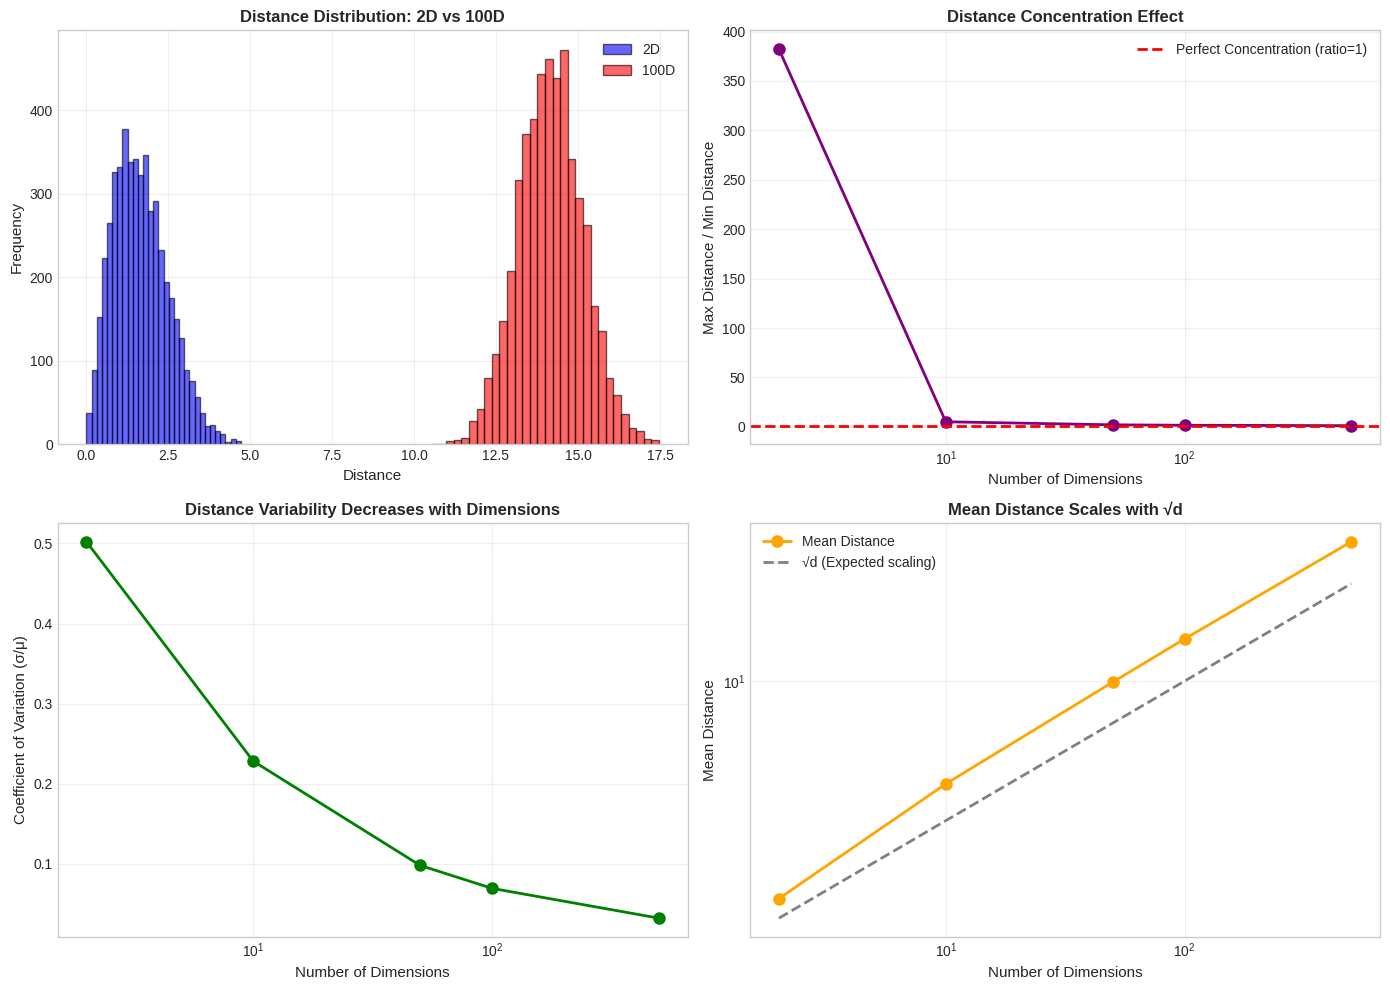

In [12]:
# ============================================================
# VISUALIZATION: CURSE OF DIMENSIONALITY - DISTANCE CONCENTRATION
# Demonstrating how distances become similar in high dimensions
# ============================================================

# Function to calculate pairwise distances in different dimensions
def compute_distance_stats(n_samples=100, dimensions_list=[2, 10, 50, 100, 500]):
    """
    Generate random data in different dimensions and compute distance statistics.
    """
    results = []
    
    for d in dimensions_list:
        # Generate random data in d dimensions
        np.random.seed(RANDOM_STATE)
        X = np.random.randn(n_samples, d)
        
        # Compute all pairwise Euclidean distances
        from scipy.spatial.distance import pdist
        distances = pdist(X, metric='euclidean')
        
        # Calculate statistics
        min_dist = distances.min()
        max_dist = distances.max()
        mean_dist = distances.mean()
        std_dist = distances.std()
        ratio = max_dist / min_dist
        
        results.append({
            'Dimensions': d,
            'Min_Distance': min_dist,
            'Max_Distance': max_dist,
            'Mean_Distance': mean_dist,
            'Std_Distance': std_dist,
            'Max/Min_Ratio': ratio,
            'Coefficient_of_Variation': std_dist / mean_dist
        })
    
    return pd.DataFrame(results)

# Compute distance statistics
df_distances = compute_distance_stats()

print("="*90)
print("DISTANCE CONCENTRATION IN HIGH DIMENSIONS")
print("="*90)
print(df_distances.to_string(index=False))
print("="*90)
print("\n📊 Key Observations:")
print("  - As dimensions increase, Max/Min ratio → 1.0")
print("  - Coefficient of variation (std/mean) decreases")
print("  - All distances become approximately equal")
print("  - Distance-based methods lose discriminative power")
print("="*90)

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Distance distributions in 2D vs 100D
ax1 = axes[0, 0]
for d, color in [(2, 'blue'), (100, 'red')]:
    np.random.seed(RANDOM_STATE)
    X = np.random.randn(100, d)
    from scipy.spatial.distance import pdist
    distances = pdist(X, metric='euclidean')
    
    ax1.hist(distances, bins=30, alpha=0.6, label=f'{d}D', color=color, edgecolor='black')

ax1.set_xlabel('Distance', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Distance Distribution: 2D vs 100D', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Max/Min ratio vs dimensions
ax2 = axes[0, 1]
ax2.plot(df_distances['Dimensions'], df_distances['Max/Min_Ratio'], 
         'o-', color='purple', linewidth=2, markersize=8)
ax2.axhline(y=1.0, color='red', linestyle='--', linewidth=2, 
            label='Perfect Concentration (ratio=1)')
ax2.set_xlabel('Number of Dimensions', fontsize=11)
ax2.set_ylabel('Max Distance / Min Distance', fontsize=11)
ax2.set_title('Distance Concentration Effect', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')

# Plot 3: Coefficient of variation
ax3 = axes[1, 0]
ax3.plot(df_distances['Dimensions'], df_distances['Coefficient_of_Variation'], 
         'o-', color='green', linewidth=2, markersize=8)
ax3.set_xlabel('Number of Dimensions', fontsize=11)
ax3.set_ylabel('Coefficient of Variation (σ/μ)', fontsize=11)
ax3.set_title('Distance Variability Decreases with Dimensions', 
              fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_xscale('log')

# Plot 4: Mean distance scaling
ax4 = axes[1, 1]
ax4.plot(df_distances['Dimensions'], df_distances['Mean_Distance'], 
         'o-', color='orange', linewidth=2, markersize=8, label='Mean Distance')
ax4.plot(df_distances['Dimensions'], np.sqrt(df_distances['Dimensions']), 
         '--', color='gray', linewidth=2, label='√d (Expected scaling)')
ax4.set_xlabel('Number of Dimensions', fontsize=11)
ax4.set_ylabel('Mean Distance', fontsize=11)
ax4.set_title('Mean Distance Scales with √d', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.set_xscale('log')
ax4.set_yscale('log')

plt.tight_layout()
plt.show()

DATA SPARSITY ANALYSIS
Dimensions   Samples Needed       Reality Check
--------------------------------------------------------------------------------
1            1e+01                ✓ Achievable with small dataset
2            1e+02                ✓ Achievable with small dataset
3            1e+03                ✓ Achievable with small dataset
4            1e+04                ✓ Achievable with medium dataset
5            1e+05                ⚠️  Requires large dataset
6            1e+06                ✗ Practically impossible
7            1e+07                ✗ Practically impossible
8            1e+08                ✗ Practically impossible
9            1e+09                ✗ Practically impossible
10           1e+10                ✗ Practically impossible

Typical available samples:
  Small dataset: 1,000
  Medium dataset: 10,000
  Large dataset: 100,000

⚠️  Beyond ~7 dimensions, maintaining density becomes impractical!


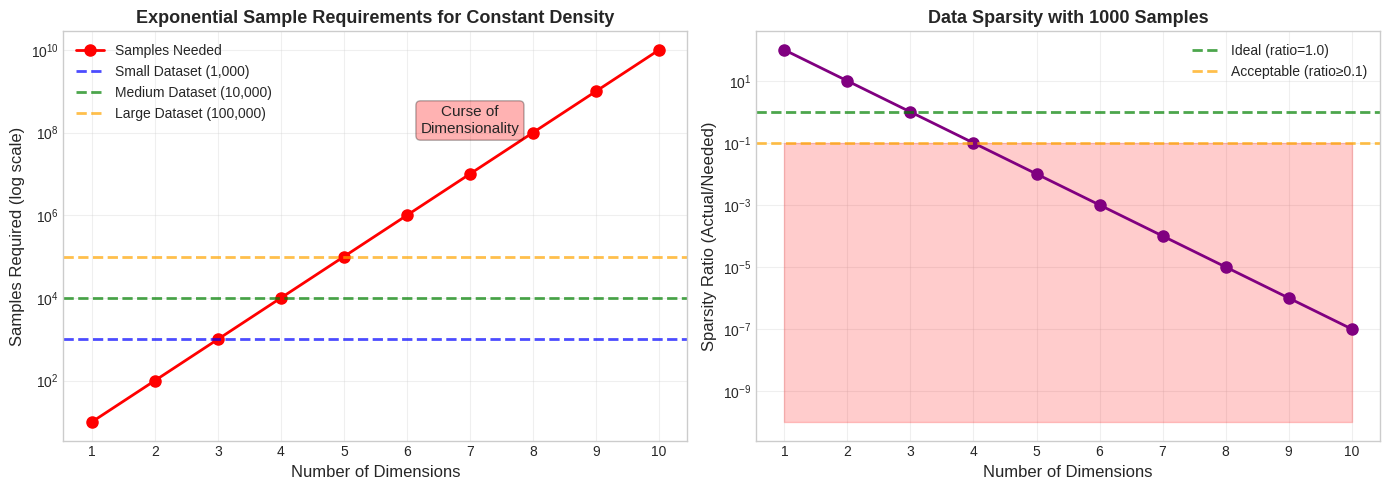

In [13]:
# ============================================================
# DEMONSTRATION: DATA SPARSITY IN HIGH DIMENSIONS
# Visualizing how data becomes sparse as dimensions increase
# ============================================================

# Calculate required samples for constant density
def samples_for_density(dimensions, density_per_unit=10):
    """
    Calculate number of samples needed to maintain constant density
    as dimensions increase (assuming unit hypercube).
    """
    return density_per_unit ** dimensions

# Calculate for different dimensions
dims = np.arange(1, 11)
samples_needed = [samples_for_density(d) for d in dims]

# Typical dataset sizes
typical_small = 1000
typical_medium = 10000
typical_large = 100000

print("="*80)
print("DATA SPARSITY ANALYSIS")
print("="*80)
print(f"{'Dimensions':<12} {'Samples Needed':<20} {'Reality Check'}")
print("-"*80)

for d, n in zip(dims, samples_needed):
    if n <= typical_small:
        reality = "✓ Achievable with small dataset"
    elif n <= typical_medium:
        reality = "✓ Achievable with medium dataset"
    elif n <= typical_large:
        reality = "⚠️  Requires large dataset"
    else:
        reality = "✗ Practically impossible"
    
    print(f"{d:<12} {n:<20.0e} {reality}")

print("="*80)
print("\nTypical available samples:")
print(f"  Small dataset: {typical_small:,}")
print(f"  Medium dataset: {typical_medium:,}")
print(f"  Large dataset: {typical_large:,}")
print("\n⚠️  Beyond ~7 dimensions, maintaining density becomes impractical!")
print("="*80)

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Exponential growth of required samples
ax1 = axes[0]
ax1.semilogy(dims, samples_needed, 'o-', color='red', linewidth=2, 
             markersize=8, label='Samples Needed')
ax1.axhline(y=typical_small, color='blue', linestyle='--', linewidth=2, 
            label=f'Small Dataset ({typical_small:,})', alpha=0.7)
ax1.axhline(y=typical_medium, color='green', linestyle='--', linewidth=2,
            label=f'Medium Dataset ({typical_medium:,})', alpha=0.7)
ax1.axhline(y=typical_large, color='orange', linestyle='--', linewidth=2,
            label=f'Large Dataset ({typical_large:,})', alpha=0.7)

ax1.set_xlabel('Number of Dimensions', fontsize=12)
ax1.set_ylabel('Samples Required (log scale)', fontsize=12)
ax1.set_title('Exponential Sample Requirements for Constant Density', 
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, which='both')
ax1.set_xticks(dims)

# Add annotation
ax1.text(7, 1e8, 'Curse of\nDimensionality', fontsize=11, ha='center',
         bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

# Plot 2: Sparsity ratio (actual vs needed)
ax2 = axes[1]
actual_samples = 1000  # Assume we have 1000 samples
sparsity_ratio = [actual_samples / n if n > 0 else 1 for n in samples_needed]

ax2.semilogy(dims, sparsity_ratio, 'o-', color='purple', linewidth=2, markersize=8)
ax2.axhline(y=1.0, color='green', linestyle='--', linewidth=2, 
            label='Ideal (ratio=1.0)', alpha=0.7)
ax2.axhline(y=0.1, color='orange', linestyle='--', linewidth=2,
            label='Acceptable (ratio≥0.1)', alpha=0.7)

ax2.set_xlabel('Number of Dimensions', fontsize=12)
ax2.set_ylabel('Sparsity Ratio (Actual/Needed)', fontsize=12)
ax2.set_title(f'Data Sparsity with {actual_samples} Samples', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, which='both')
ax2.set_xticks(dims)

# Annotate sparse region
ax2.fill_between(dims, 1e-10, 0.1, alpha=0.2, color='red', 
                 label='Severe Sparsity')

plt.tight_layout()
plt.show()

## 9. No Free Lunch Theorem

The No Free Lunch (NFL) theorem is a fundamental result in machine learning that explains why there is no universally best algorithm for all problems.

---

### 9.1 The Theorem Statement

**Formal Statement:**

"Averaged over all possible problems, every optimization algorithm performs equally well."

**Practical Translation:**

No single machine learning algorithm dominates all others across all possible datasets and problems. An algorithm that works exceptionally well on one problem may perform poorly on another.

---

### 9.2 What This Means in Practice

| Implication | Explanation |
|-------------|-------------|
| **No "Best" Algorithm** | There is no universally superior ML algorithm |
| **Problem-Dependent Performance** | Algorithm effectiveness depends on problem characteristics |
| **Domain Knowledge Matters** | Understanding the problem guides algorithm selection |
| **Experimentation Required** | Must test multiple algorithms on specific data |
| **Assumptions are Critical** | Every algorithm makes implicit assumptions about data |

---

### 9.3 Why the NFL Theorem Exists

**Core Reason:** Every algorithm makes assumptions (inductive bias) about the problem structure.

**Algorithm Assumptions:**

| Algorithm | Key Assumptions | Works Well When | Fails When |
|-----------|----------------|-----------------|------------|
| **Linear Regression** | Linear relationship between X and y | Data is truly linear | Non-linear patterns exist |
| **k-Nearest Neighbors** | Similar inputs → similar outputs | Local similarity is meaningful | High dimensions, irrelevant features |
| **Decision Trees** | Axis-aligned decision boundaries | Features have clear thresholds | Diagonal/curved boundaries |
| **Naive Bayes** | Features are conditionally independent | Independence holds approximately | Strong feature interactions |
| **Neural Networks** | Smooth, hierarchical features | Large data, complex patterns | Small data, simple patterns |
| **SVM** | Margin maximization is optimal | Clear separation exists | Highly overlapping classes |

**The Tradeoff:**
```
Strong Assumptions → Fast, Interpretable → Fails on mismatched problems
Weak Assumptions → Flexible, Powerful → Requires more data, computation
```

---

### 9.4 Inductive Bias

**Definition:** Inductive bias is the set of assumptions an algorithm makes to generalize from training data to unseen data.

**Examples of Inductive Bias:**

| Algorithm | Inductive Bias |
|-----------|---------------|
| **Linear Models** | "The relationship is linear" |
| **Decision Trees** | "Similar samples have similar outcomes; boundaries are axis-aligned" |
| **kNN** | "Nearby points in feature space have similar outputs" |
| **Naive Bayes** | "Features are independent given the class" |
| **Neural Networks** | "The function is smooth and can be decomposed hierarchically" |
| **Ensemble Methods** | "Averaging multiple models reduces errors" |

**Why Bias is Necessary:**

Without inductive bias, learning is impossible. The algorithm needs assumptions to prefer one hypothesis over another.
```
No Bias → Cannot generalize
Too Strong Bias → Inflexible, high bias errors
Appropriate Bias → Good generalization
```

---

### 9.5 Matching Algorithm to Problem

**Key Principle:** Choose algorithms whose assumptions align with problem characteristics.

#### Problem Characteristic: Linear Relationships

**Best Algorithms:**
- Linear Regression
- Logistic Regression
- Linear SVM

**Why:** These algorithms assume linearity, which matches the problem structure.

---

#### Problem Characteristic: Non-linear, Complex Interactions

**Best Algorithms:**
- Neural Networks
- Gradient Boosting (XGBoost, LightGBM)
- Random Forest
- SVM with RBF kernel

**Why:** These can model complex, non-linear relationships.

---

#### Problem Characteristic: High-Dimensional, Sparse Data

**Best Algorithms:**
- Naive Bayes
- Linear models with L1 regularization (Lasso)
- Tree-based ensembles

**Why:** These handle high dimensions and perform implicit/explicit feature selection.

---

#### Problem Characteristic: Small Dataset

**Best Algorithms:**
- Simple linear models (Ridge, Lasso)
- Naive Bayes
- Regularized logistic regression

**Avoid:**
- Deep neural networks
- Complex ensemble methods

**Why:** Complex models require large datasets to avoid overfitting.

---

#### Problem Characteristic: Large Dataset, Complex Patterns

**Best Algorithms:**
- Deep Neural Networks
- Gradient Boosting
- Large Random Forests

**Why:** Sufficient data to learn complex patterns without overfitting.

---

### 9.6 Practical Algorithm Selection Guidelines

**Step 1: Understand Problem Characteristics**

| Question | Impact on Algorithm Choice |
|----------|---------------------------|
| Is the relationship linear or non-linear? | Linear models vs tree-based/neural nets |
| How much data do you have? | Simple vs complex models |
| Are features independent? | Naive Bayes vs other methods |
| Do you need interpretability? | Linear/trees vs neural nets |
| Are there categorical features? | Tree-based models excel |
| Is data high-dimensional? | Regularization, dimensionality reduction |

---

**Step 2: Start Simple, Then Increase Complexity**
```
Recommended Order:
1. Baseline: Simple model (Linear/Logistic Regression)
2. If insufficient: Regularized models (Ridge/Lasso)
3. If still insufficient: Tree-based (Random Forest)
4. If still insufficient: Boosting (XGBoost/LightGBM)
5. If still insufficient: Neural Networks (if sufficient data)
```

**Rationale:**
- Simple models are fast to train and interpret
- Provides baseline performance
- Avoids premature complexity
- Easier debugging

---

**Step 3: Compare Multiple Algorithms**

Always test several algorithms from different families:

| Family | Representative Algorithms |
|--------|--------------------------|
| **Linear** | Linear/Logistic Regression, Ridge, Lasso |
| **Tree-Based** | Decision Tree, Random Forest |
| **Boosting** | XGBoost, LightGBM, CatBoost |
| **Instance-Based** | k-Nearest Neighbors |
| **Probabilistic** | Naive Bayes, Gaussian Processes |
| **Support Vector** | SVM (linear, RBF) |
| **Neural** | MLP, Deep Networks (if applicable) |

**Cross-validate all and compare performance.**

---

### 9.7 No Free Lunch Does NOT Mean

**Common Misconceptions:**

❌ **"All algorithms are equal"**
- FALSE: On specific problems, some algorithms vastly outperform others
- TRUE: Averaged across ALL possible problems, they're equal

❌ **"Algorithm selection doesn't matter"**
- FALSE: Choosing the right algorithm for your specific problem is crucial
- TRUE: There's no universal winner across all problems

❌ **"We should always use the most complex algorithm"**
- FALSE: Complex models overfit on small data and lack interpretability
- TRUE: Match model complexity to problem complexity and data size

---

### 9.8 Key Takeaways

**What the NFL Theorem Teaches Us:**

✅ **Algorithm selection is problem-specific**
- Understand your data characteristics
- Match algorithm assumptions to problem structure

✅ **Experimentation is essential**
- Always compare multiple algorithms
- Use cross-validation for fair comparison

✅ **Domain knowledge is valuable**
- Understanding the problem helps select appropriate algorithms
- Feature engineering based on domain knowledge is powerful

✅ **No silver bullet**
- Be skeptical of claims that one algorithm "always works best"
- Context and problem specifics matter enormously

---

### 9.9 Real-World Algorithm Performance

**Empirical Observations (Not Contradicting NFL):**

While NFL says no algorithm is universally best, practical experience shows:

| Problem Domain | Often Effective Algorithms |
|----------------|---------------------------|
| **Tabular Data (Kaggle Competitions)** | XGBoost, LightGBM, CatBoost |
| **Computer Vision** | Convolutional Neural Networks (CNNs) |
| **Natural Language Processing** | Transformers (BERT, GPT) |
| **Time Series Forecasting** | ARIMA, LSTMs, Gradient Boosting |
| **Recommendation Systems** | Collaborative Filtering, Matrix Factorization |
| **Small Data Classification** | Logistic Regression, Random Forest |

**Why These Patterns Exist:**

These domains share common characteristics:
- Tabular data often has non-linear interactions → Boosting excels
- Images have spatial hierarchies → CNNs designed for this
- Text has sequential dependencies → Transformers model this

**NFL still holds:** These algorithms would fail on problems with different structures.

---

## 10. When NOT to Use Machine Learning

Machine learning is powerful but not always the appropriate solution. Understanding when NOT to use ML is as important as knowing when to use it.

---

### 10.1 Rule-Based Solutions are Better

**Use Rule-Based Systems When:**

| Scenario | Example | Why Rules > ML |
|----------|---------|----------------|
| **Rules are simple and complete** | Age ≥ 18 → "Adult" | No ambiguity, 100% accuracy possible |
| **Deterministic logic** | If password length < 8, reject | Clear requirement, no learning needed |
| **Compliance/Legal requirements** | Tax calculation formulas | Must follow exact legal specifications |
| **Transparent decision required** | Credit rejection reasons (legally required) | Rules are fully explainable |
| **Zero error tolerance** | Safety-critical thresholds | ML predictions have inherent uncertainty |

**Examples:**
```python
# Rule-Based (Better for this case)
if temperature > 100:
    status = "Fever"
elif temperature > 98.6:
    status = "Slightly elevated"
else:
    status = "Normal"

# ML-Based (Overkill and less reliable)
# Train classifier on temperature → status mapping
# More complex, introduces unnecessary uncertainty
```

---

### 10.2 Insufficient or Inappropriate Data

**Don't Use ML When:**

| Data Issue | Problem | Alternative |
|------------|---------|-------------|
| **Too few samples** | < 100 samples for complex problem | Use simpler models or domain expertise |
| **No labeled data** | Cannot obtain ground truth labels | Use rule-based or unsupervised methods |
| **Data not representative** | Training data doesn't match deployment | Collect better data first |
| **Features don't contain signal** | Input features unrelated to output | ML will fail regardless of algorithm |
| **High noise-to-signal ratio** | Labels are inconsistent or random | Clean data or reconsider approach |

**Example - Insufficient Data:**
```
Problem: Predict rare disease (10 cases per year)
Available data: 50 cases over 5 years
Features: 200 medical measurements

Issue: 50 samples << 200 features
Solution: Use clinical guidelines, not ML
```

---

### 10.3 Problem is Too Simple

**When Simpler Solutions Suffice:**

| Problem | ML Approach (Overkill) | Simple Approach (Better) |
|---------|----------------------|-------------------------|
| Calculate sales tax | Train regression model | Multiply by tax rate |
| Convert currency | Neural network | Use exchange rate API |
| Check password strength | Classifier | Count length, special chars |
| Sort list of numbers | Reinforcement learning | Use built-in sort() |
| Find maximum value | Deep learning | Use max() function |

**Principle:**
```
If problem can be solved with:
- Mathematical formula
- Simple algorithm (sorting, searching)
- Database query
- Basic if-else logic

Then don't use ML!
```

---

### 10.4 Interpretability is Critical

**ML May Not Be Suitable When:**

| Domain | Requirement | Issue with ML |
|--------|-------------|---------------|
| **Medical diagnosis** | Must explain reasoning | Black-box models lack transparency |
| **Legal decisions** | Right to explanation | Neural networks are opaque |
| **Financial trading** | Regulatory compliance | Model decisions must be auditable |
| **Loan approval** | Fair lending laws | Need to explain rejections |
| **Safety-critical systems** | Certification required | Cannot prove ML model correctness |

**Alternative Approaches:**

- Use interpretable models (linear models, decision trees)
- Apply interpretability techniques (SHAP, LIME) if ML is necessary
- Hybrid: ML for screening, human + rules for final decision

---

### 10.5 Real-Time Constraints Cannot Be Met

**When ML is Too Slow:**

| Application | Latency Requirement | ML Challenge |
|-------------|--------------------| --------------|
| **High-frequency trading** | Microseconds | Deep learning: milliseconds |
| **Autonomous vehicle collision avoidance** | < 10ms | Complex models too slow |
| **Real-time video processing** | 30 fps (33ms/frame) | Large models miss deadline |
| **Embedded systems** | Limited compute | Models too large for device |

**Solutions:**
- Use simpler, faster models
- Model compression techniques
- Hardware acceleration (GPU, TPU)
- Hybrid: ML preprocessing + fast rules

---

### 10.6 Cost-Benefit Analysis Doesn't Justify ML

**Consider Total Costs:**

| Cost Category | Considerations |
|---------------|----------------|
| **Data Collection** | Labeling, storage, cleaning |
| **Model Development** | Data scientist salaries, compute resources |
| **Infrastructure** | Servers, GPUs, cloud costs |
| **Maintenance** | Monitoring, retraining, debugging |
| **Opportunity Cost** | Time spent on ML vs other solutions |

**Example - Cost Analysis:**
```
Problem: Categorize 1000 emails per month (low volume)

ML Approach:
- Data scientist time: $10,000
- Labeling data: $2,000
- Infrastructure: $500/month
- Total: $12,500 + ongoing costs

Simple Approach:
- Keyword rules: 2 hours × $50/hour = $100
- Maintenance: $50/month
- Total: $100 + minimal ongoing

Verdict: Rules-based approach is 100× cheaper
```

---

### 10.7 Ethical or Legal Concerns

**When ML Should Be Avoided:**

| Concern | Issue | Example |
|---------|-------|---------|
| **Discrimination risk** | Model learns biased patterns | Hiring algorithms discriminating by race/gender |
| **Privacy violation** | Model exposes sensitive data | Predicting health status from public data |
| **Lack of consent** | Data used without permission | Facial recognition without opt-in |
| **Harmful applications** | Technology enables harm | Deepfakes, surveillance abuse |
| **Unintended consequences** | Model behavior unpredictable | Recommendation algorithms amplifying extremism |

**Ethical Questions to Ask:**

- Could this model cause harm to individuals or groups?
- Is the data collected and used ethically?
- Are we transparent about ML usage?
- Can users opt out?
- Have we considered unintended consequences?

---

### 10.8 The Problem is Constantly Changing

**ML Struggles With:**

| Scenario | Challenge | Better Approach |
|----------|-----------|-----------------|
| **Rapidly evolving rules** | Model becomes outdated quickly | Adaptive rule-based system |
| **Non-stationary distribution** | Train data ≠ deployment data | Real-time adaptation, human oversight |
| **Adversarial environment** | Opponents actively counter model | Game theory, robust rules |
| **Novel situations** | No training data for new cases | Human judgment, expert systems |

**Example - Adversarial Scenario:**
```
Problem: Spam detection

Issue: Spammers constantly adapt to bypass filters
ML limitation: Model trained on old spam patterns

Better approach: Hybrid system
- ML for known patterns
- Human review for novel attempts
- Regular retraining with new adversarial examples
```

---

### 10.9 Decision Tree: Should I Use ML?
```
Start
  ↓
Do I have data with labels?
  ↓
  NO → Use rules or unsupervised methods
  ↓
  YES
  ↓
Do I have enough data (samples >> features)?
  ↓
  NO → Collect more data or use simpler models
  ↓
  YES
  ↓
Is the problem too simple for ML?
  ↓
  YES → Use formula/algorithm/rules
  ↓
  NO
  ↓
Do features contain predictive signal?
  ↓
  NO → Improve feature engineering or abandon ML
  ↓
  YES
  ↓
Is interpretability legally/ethically required?
  ↓
  YES → Use interpretable models or rules
  ↓
  NO (or interpretable ML acceptable)
  ↓
Can I meet latency/resource constraints?
  ↓
  NO → Optimize or use simpler approach
  ↓
  YES
  ↓
Does cost-benefit analysis justify ML?
  ↓
  NO → Use cheaper alternative
  ↓
  YES
  ↓
✅ ML is appropriate! Proceed with model development
```

---

### 10.10 Healthy Skepticism About ML

**Red Flags - Reconsider ML When:**

⚠️ **Selling point is "AI-powered"**
- Many problems don't need ML
- ML adds complexity, cost, and maintenance

⚠️ **Stakeholders don't understand ML limitations**
- Unrealistic expectations lead to disappointment
- Educate about uncertainty, errors, and maintenance

⚠️ **You're forcing ML onto a problem**
- If simpler solution works, use it
- ML is a tool, not a goal

⚠️ **You can't explain why ML would work**
- If you can't articulate why features predict target, ML likely won't work either

---

### 10.11 When to Use ML: Positive Indicators

✅ **Use ML When:**

| Indicator | Explanation |
|-----------|-------------|
| **Pattern is too complex for rules** | Non-linear, high-dimensional relationships |
| **Rules are unknown** | No domain expert can specify complete rules |
| **Data is abundant** | Thousands+ of labeled examples available |
| **Approximate solution is acceptable** | 95% accuracy is valuable (don't need 100%) |
| **Problem is predictive** | Features contain signal about target |
| **Benefit exceeds cost** | Value of predictions > development + maintenance cost |
| **Continuous improvement possible** | More data improves model over time |

**Examples:**

- Image recognition (too complex for rules)
- Product recommendations (patterns exist but are unknown)
- Fraud detection (approximate is ok, catches most fraud)
- Voice recognition (abundant data, complex patterns)

---

### 10.12 Summary: ML Appropriateness Checklist

**Before Starting ML Project, Verify:**

| ✅ Requirement | Status |
|----------------|--------|
| **Sufficient labeled data** | Thousands+ samples, features < samples |
| **Predictive features** | Input variables relate to output |
| **Problem complexity** | Too complex for simple rules |
| **Acceptable uncertainty** | Don't need 100% accuracy |
| **Cost justified** | ROI positive |
| **Ethical approval** | No discrimination, privacy respected |
| **Technical feasibility** | Can meet latency/resource requirements |
| **Interpretability acceptable** | Stakeholders ok with model opacity (or use interpretable models) |

**If any requirement fails, reconsider whether ML is appropriate.**

---

## 11. Summary & Key Takeaways

This notebook established the foundational concepts necessary for understanding and applying machine learning effectively. Let's consolidate the key learnings.

---

### 11.1 Core Concepts Recap

#### Machine Learning Fundamentals

| Concept | Key Points |
|---------|------------|
| **What is ML?** | Learning patterns from data without explicit programming |
| **Algorithm vs Model** | Algorithm = learning procedure; Model = trained artifact |
| **Learning Process** | Initialize → Predict → Calculate loss → Update parameters → Repeat |
| **Parameters vs Hyperparameters** | Parameters learned from data; Hyperparameters set before training |

---

#### ML Types and When to Use Them

| Type | Use When | Example Algorithms |
|------|----------|-------------------|
| **Supervised Learning** | Have labeled data, need predictions | Linear Regression, Random Forest, Neural Networks |
| **Unsupervised Learning** | No labels, want to find structure | k-Means, PCA, DBSCAN |
| **Semi-Supervised** | Few labels, many unlabeled samples | Self-training, Co-training |

---

#### Data Structures

| Element | Definition | Mathematical Notation |
|---------|------------|----------------------|
| **Sample** | Single data point | xᵢ (feature vector), yᵢ (label) |
| **Feature** | Input variable/attribute | Individual dimension in feature space |
| **Label** | Output variable (supervised) | Target value to predict |
| **Feature Matrix** | All samples × all features | X, shape (m, n) |
| **Target Vector** | All labels | y, shape (m,) |

**Critical Rule:** Rows = samples, Columns = features

---

### 11.2 Training vs Inference - The Sacred Separation

| Phase | Training | Inference |
|-------|----------|-----------|
| **Purpose** | Learn patterns | Apply learned knowledge |
| **Data** | X_train + y_train (labeled) | X_new (unlabeled) |
| **Process** | Forward + backward pass | Forward pass only |
| **Parameters** | Updated continuously | Frozen (no changes) |
| **Output** | Trained model | Predictions |
| **Frequency** | Once or periodic retraining | Continuous |

**Golden Rules:**

1. ✅ Never train and test on the same data
2. ✅ Never preprocess data before splitting (causes leakage)
3. ✅ Keep test set untouched until final evaluation
4. ✅ Use cross-validation on training set for model selection

---

### 11.3 Loss Functions & Optimization

#### Loss Functions Summary

| Loss Function | Type | Use Case | Outlier Sensitivity |
|---------------|------|----------|-------------------|
| **MSE** | Regression | General purpose | High (quadratic penalty) |
| **MAE** | Regression | Data with outliers | Low (linear penalty) |
| **Huber** | Regression | Robust regression | Medium (hybrid) |
| **Binary Cross-Entropy** | Classification | Binary classification | N/A |
| **Categorical Cross-Entropy** | Classification | Multiclass | N/A |

---

#### Gradient Descent Variants

| Variant | Batch Size | Speed | Gradient Quality | Typical Use |
|---------|------------|-------|------------------|-------------|
| **Batch GD** | All samples | Slow | Exact | Small datasets |
| **SGD** | 1 sample | Very fast | Noisy | Online learning |
| **Mini-batch GD** | 32-512 | Fast | Moderate noise | Deep learning (standard) |

**Key Insight:** Learning rate (η) is critical
- Too small → slow convergence
- Too large → divergence
- Just right → fast, stable convergence

---

### 11.4 Bias-Variance Tradeoff - The Central Challenge

#### The Decomposition
```
Total Error = Bias² + Variance + Irreducible Error
```

| Component | Cause | Symptom | Solution |
|-----------|-------|---------|----------|
| **High Bias** | Model too simple | Both train and test errors high | Increase complexity |
| **High Variance** | Model too complex | Train error low, test error high | Simplify model, regularize, more data |
| **Irreducible Error** | Data noise | Cannot be reduced | Accept as lower bound |

---

#### Diagnostic Patterns

**Underfitting (High Bias):**
```
Training error: HIGH
Test error: HIGH
Gap: SMALL
Learning curves: Both plateau at high values
```
→ Increase model complexity, add features, reduce regularization

**Overfitting (High Variance):**
```
Training error: LOW
Test error: HIGH
Gap: LARGE
Learning curves: Large gap between train and validation
```
→ Simplify model, add regularization, collect more data, feature selection

**Optimal Fit:**
```
Training error: MODERATE
Test error: MODERATE
Gap: SMALL
Learning curves: Converge to acceptable error
```
→ Model is ready for deployment

---

### 11.5 Curse of Dimensionality

#### The Problems

| Problem | Description | Impact |
|---------|-------------|--------|
| **Exponential Volume Growth** | Space grows as d^n | Data becomes extremely sparse |
| **Distance Concentration** | All distances become similar | Distance-based methods fail |
| **Sample Requirements** | Need ~10^d samples | Practically impossible for high d |

---

#### Algorithm Sensitivity

**Highly Affected:**
- k-Nearest Neighbors ⚠️⚠️⚠️
- k-Means Clustering ⚠️⚠️⚠️
- Density-based methods ⚠️⚠️

**Relatively Robust:**
- Decision Trees ✓
- Random Forest ✓
- Gradient Boosting ✓
- Lasso (feature selection) ✓

---

#### Solutions

| Strategy | When to Use | Examples |
|----------|-------------|----------|
| **Feature Selection** | Many irrelevant features | RFE, L1 regularization, tree importance |
| **Dimensionality Reduction** | Correlated features | PCA, t-SNE, UMAP |
| **Regularization** | High dimensions, risk of overfitting | Ridge, Lasso, ElasticNet |
| **Collect More Data** | Most effective but often impractical | Data collection campaigns |

**Rule of Thumb:** If features > 10% of samples, take action

---

### 11.6 No Free Lunch Theorem

**Core Message:** No algorithm is universally best across all problems.

**Implications:**

✅ **DO:**
- Understand problem characteristics
- Match algorithm assumptions to data structure
- Compare multiple algorithms
- Use domain knowledge to guide selection
- Experiment and cross-validate

❌ **DON'T:**
- Assume one algorithm always wins
- Skip algorithm comparison
- Ignore problem-specific context
- Trust claims of "universal best algorithm"

---

#### Algorithm Selection Guidelines

| Problem Characteristic | Recommended Algorithms |
|----------------------|----------------------|
| **Linear relationship** | Linear/Logistic Regression, Linear SVM |
| **Non-linear, complex** | Neural Networks, Gradient Boosting, Random Forest |
| **Small dataset** | Simple models with regularization, Naive Bayes |
| **Large dataset** | Deep learning, large ensembles |
| **High dimensions** | Lasso, tree-based methods, regularization |
| **Need interpretability** | Linear models, Decision Trees, simple rules |

---

### 11.7 When NOT to Use ML

**Avoid ML When:**

| Scenario | Why | Alternative |
|----------|-----|-------------|
| **Rules are simple and complete** | 100% accuracy possible with rules | Rule-based system |
| **Insufficient data** | Not enough samples to learn patterns | Collect more data or use domain expertise |
| **Problem is too simple** | Formula/algorithm solves it | Use direct computation |
| **Interpretability is critical** | Black-box models unacceptable | Interpretable models or rules |
| **Real-time constraints** | ML too slow | Faster algorithms, hardware acceleration |
| **Cost > benefit** | Development cost exceeds value | Cheaper alternatives |
| **Ethical concerns** | Risk of harm or discrimination | Reconsider approach |

**Decision Checklist Before Starting ML:**
- ✅ Sufficient labeled data?
- ✅ Features contain predictive signal?
- ✅ Problem too complex for rules?
- ✅ Approximate solution acceptable?
- ✅ Cost justified?
- ✅ Ethical approval?
- ✅ Technical feasibility?

---

### 11.8 Critical Lessons for Success

#### Lesson 1: Data Quality Trumps Algorithm Choice
```
Good data + simple model > Bad data + complex model
```

Focus on:
- Collecting representative data
- Cleaning and preprocessing carefully
- Engineering informative features
- Avoiding data leakage

---

#### Lesson 2: Start Simple, Increase Complexity Gradually

**Recommended Progression:**
1. Baseline: Simple linear model
2. Add regularization (Ridge/Lasso)
3. Try tree-based models (Random Forest)
4. Experiment with boosting (XGBoost/LightGBM)
5. Consider neural networks (if sufficient data)

**Why:**
- Establishes baseline performance
- Simple models are easier to debug
- Avoids premature optimization
- Often, simple models are sufficient

---

#### Lesson 3: Validation Strategy is Crucial

**Proper Validation Flow:**
```
1. Split data: Train / Validation / Test
2. Train on Train set
3. Tune hyperparameters using Validation set
4. Final evaluation on Test set (once only!)
5. Use cross-validation for robust estimates
```

**Common Mistakes to Avoid:**
- ❌ Testing on training data
- ❌ Preprocessing before splitting
- ❌ Hyperparameter tuning on test set
- ❌ Multiple evaluations on test set

---

#### Lesson 4: Understand Model Behavior via Learning Curves

**Always Plot:**
- Training error vs iterations/epochs
- Validation error vs iterations/epochs
- Training error vs dataset size
- Validation error vs dataset size

**Diagnose From Curves:**
- Both errors high → High bias (underfit)
- Large gap → High variance (overfit)
- Converged at low error → Optimal

---

#### Lesson 5: Feature Engineering Often Beats Algorithm Tuning

**Impact Hierarchy (typical):**
```
1. Quality of features (biggest impact)
2. Choice of algorithm family
3. Hyperparameter tuning (smallest impact)
```

Invest time in:
- Understanding domain
- Creating meaningful features
- Removing irrelevant features
- Handling missing values properly

---

### 11.9 Mental Models to Remember

#### Model Complexity Spectrum
```
Too Simple ←――――――――――――――→ Too Complex
(High Bias)        (Sweet Spot)        (High Variance)
    ↓                   ↓                      ↓
Underfits          Generalizes            Overfits
```

**Navigation:**
- Start in middle
- If both errors high → move right (more complex)
- If large train-test gap → move left (simpler)

---

#### The ML Workflow Loop
```
┌─────────────────────────────────────────┐
│                                         │
│  1. Understand Problem                  │
│         ↓                               │
│  2. Collect & Clean Data                │
│         ↓                               │
│  3. Feature Engineering                 │
│         ↓                               │
│  4. Choose Algorithm(s)                 │
│         ↓                               │
│  5. Train & Validate                    │
│         ↓                               │
│  6. Diagnose Errors                     │
│         ↓                               │
│  7. Iterate ──────────┐                 │
│         ↓             │                 │
│  8. Test (once)       │                 │
│         ↓             │                 │
│  9. Deploy & Monitor  │                 │
│         ↓             │                 │
│  10. Retrain ─────────┘                 │
│                                         │
└─────────────────────────────────────────┘
```

---

#### Distance-Based vs Tree-Based Thinking

**Distance-Based (kNN, k-Means, SVM-RBF):**
- Requires meaningful distances
- Sensitive to feature scales
- Struggles in high dimensions
- Needs feature scaling

**Tree-Based (Decision Tree, RF, Boosting):**
- Uses axis-aligned splits
- Scale-invariant (no scaling needed)
- Handles high dimensions better
- Performs implicit feature selection

**Choose based on problem characteristics.**

---

### 11.10 Common Pitfalls to Avoid

| Pitfall | Why It's Bad | Prevention |
|---------|--------------|------------|
| **Data leakage** | Inflated performance estimates | Split before preprocessing |
| **Testing on training data** | Overoptimistic results | Always use separate test set |
| **Ignoring class imbalance** | Model ignores minority class | Use appropriate metrics, SMOTE |
| **Not scaling features** | Distance-based methods fail | StandardScaler, MinMaxScaler |
| **Overfitting** | Poor generalization | Regularization, cross-validation |
| **Underfitting** | Missing patterns | Increase complexity, add features |
| **Ignoring domain knowledge** | Suboptimal features | Collaborate with domain experts |
| **Premature complexity** | Hard to debug, maintain | Start simple, increase gradually |

---

### 11.11 What's Next: Roadmap to Mastery

This notebook covered **ML Foundations**. The complete learning path:

**✅ Completed: Notebook 1 - ML Foundations**
- Core concepts
- Training vs inference
- Loss functions & optimization
- Bias-variance tradeoff
- Curse of dimensionality
- No Free Lunch theorem
- When (not) to use ML

---

**📘 Next: Notebook 2 - Data Mastery**

Topics to cover:
- Exploratory Data Analysis (EDA)
- Handling missing values (MCAR, MAR, MNAR)
- Outlier detection and treatment
- Encoding strategies (one-hot, label, target)
- Feature scaling (when and how)
- Feature engineering techniques
- Data leakage prevention
- Creating model-ready datasets

---

**📘 Future: Notebooks 3-5**

- **Notebook 3:** All Regression Models
  - Linear, Ridge, Lasso, ElasticNet
  - Tree-based regression
  - Gradient Boosting
  - Model comparison

- **Notebook 4:** All Classification Models
  - Logistic Regression, Naive Bayes
  - Tree-based classification
  - Metrics deep dive
  - Class imbalance handling

- **Notebook 5:** Advanced Topics
  - Unsupervised learning (clustering, PCA)
  - Ensemble methods
  - Interpretability (SHAP, LIME)
  - Production considerations

---

### 11.12 Final Thoughts

**Machine Learning is Not Magic:**

It's a systematic approach to learning patterns from data. Success requires:

1. **Understanding fundamentals** (this notebook)
2. **Quality data** (next notebook)
3. **Appropriate algorithms** (notebooks 3-4)
4. **Proper validation** (throughout)
5. **Continuous learning** (always)

---

**Key Principles to Carry Forward:**

✅ **Data First:** Great data beats great algorithms

✅ **Simplicity First:** Start simple, add complexity only when needed

✅ **Validate Properly:** Never trust a model you haven't validated correctly

✅ **Understand Trade-offs:** Bias-variance, interpretability-accuracy, speed-performance

✅ **Domain Knowledge:** Leverage expertise to guide feature engineering

✅ **Experimentation:** Compare multiple approaches systematically

✅ **Critical Thinking:** Question results, understand model behavior

---

**You Now Have:**

- ✅ Conceptual foundation for all ML algorithms
- ✅ Understanding of training, validation, testing
- ✅ Ability to diagnose underfitting and overfitting
- ✅ Knowledge of when ML is (and isn't) appropriate
- ✅ Framework for algorithm selection

**Ready to build on this foundation in Notebook 2!**

---

## 🎯 Notebook 1 Complete

**Achievement Unlocked:** ML Foundations Mastered

This notebook serves as your reference guide. Return to it whenever you need to:
- Understand why a model is underfitting or overfitting
- Diagnose learning curve patterns
- Choose between algorithms
- Avoid common pitfalls
- Explain ML concepts to others

**Next Step:** Proceed to Notebook 2 - Data Mastery

---

*"Understanding the fundamentals deeply is more valuable than knowing many algorithms superficially."*

---

In [14]:
# ============================================================
# NOTEBOOK 1 COMPLETION SUMMARY
# Quick reference for key concepts covered
# ============================================================

print("\n" + "="*100)
print(" " * 30 + "NOTEBOOK 1: ML FOUNDATIONS - COMPLETION SUMMARY")
print("="*100)

# Section-by-section summary with cleaner formatting
sections_summary = [
    ("1. Introduction", 
     "Foundational ML workflow understanding",
     "ML is systematic, not magic"),
    
    ("2. What is ML?", 
     "Algorithms learn patterns from data",
     "Distinguish algorithm from model"),
    
    ("3. ML Types", 
     "Supervised vs Unsupervised learning",
     "Choose appropriate learning type"),
    
    ("4. Core Concepts", 
     "Features, labels, samples structure",
     "Build proper feature matrix X and target y"),
    
    ("5. Training vs Inference", 
     "Train on labeled data, predict on new data",
     "Split data properly, avoid leakage"),
    
    ("6. Loss Functions", 
     "Quantify error and optimize",
     "Select appropriate loss function"),
    
    ("7. Bias-Variance Tradeoff", 
     "Balance model complexity",
     "Diagnose underfit vs overfit"),
    
    ("8. Curse of Dimensionality", 
     "High dimensions cause sparsity",
     "Apply dimensionality reduction"),
    
    ("9. No Free Lunch", 
     "No universal best algorithm",
     "Compare multiple algorithms"),
    
    ("10. When NOT to Use ML", 
     "ML not always appropriate",
     "Evaluate simpler solutions first"),
    
    ("11. Summary", 
     "Data quality > algorithm choice",
     "Apply all principles together")
]

# Print formatted summary
print(f"\n{'Section':<30} {'Key Takeaway':<45} {'Critical Skill':<45}")
print("-"*100)
for section, takeaway, skill in sections_summary:
    print(f"{section:<30} {takeaway:<45} {skill:<45}")

print("="*100)

# Concepts mastered
print("\n📊 CONCEPTS MASTERED:")
print("="*100)
concepts = [
    "Training vs Inference separation",
    "Bias-Variance tradeoff diagnosis",
    "Loss function selection",
    "Gradient descent optimization",
    "Curse of dimensionality understanding",
    "Algorithm selection framework",
    "When (not) to use ML"
]
for i, concept in enumerate(concepts, 1):
    print(f"  {i}. ✓ {concept}")

# Skills acquired
print("\n🎯 SKILLS ACQUIRED:")
print("="*100)
skills = [
    "Read and interpret learning curves",
    "Diagnose underfitting vs overfitting",
    "Choose appropriate algorithms",
    "Avoid data leakage",
    "Structure ML problems correctly"
]
for i, skill in enumerate(skills, 1):
    print(f"  {i}. ✓ {skill}")

# Next steps
print("\n📚 READY FOR NOTEBOOK 2: DATA MASTERY")
print("="*100)
next_topics = [
    "Exploratory Data Analysis (EDA)",
    "Missing value handling strategies",
    "Feature encoding techniques",
    "Feature scaling methods",
    "Feature engineering practices",
    "Creating model-ready datasets"
]
for i, topic in enumerate(next_topics, 1):
    print(f"  {i}. → {topic}")

# Statistics
print("\n📈 NOTEBOOK 1 STATISTICS:")
print("="*100)
stats = {
    'Total Sections': 11,
    'Code Cells': 14,
    'Markdown Cells': 13,
    'Visualizations': 15,
    'Key Concepts': 7,
    'Practical Skills': 5
}
for key, value in stats.items():
    print(f"  • {key:<25}: {value}")

print("\n" + "="*100)
print(" " * 25 + "🎉 CONGRATULATIONS! You've completed ML Foundations.")
print("="*100)
print("\n💡 Pro Tip: Bookmark this notebook as your ML reference guide!")
print("📌 Return here whenever you need to review fundamental concepts.\n")


                              NOTEBOOK 1: ML FOUNDATIONS - COMPLETION SUMMARY

Section                        Key Takeaway                                  Critical Skill                               
----------------------------------------------------------------------------------------------------
1. Introduction                Foundational ML workflow understanding        ML is systematic, not magic                  
2. What is ML?                 Algorithms learn patterns from data           Distinguish algorithm from model             
3. ML Types                    Supervised vs Unsupervised learning           Choose appropriate learning type             
4. Core Concepts               Features, labels, samples structure           Build proper feature matrix X and target y   
5. Training vs Inference       Train on labeled data, predict on new data    Split data properly, avoid leakage           
6. Loss Functions              Quantify error and optimize                   Sele

---

## 📚 References and Further Reading

### Books
- **"The Elements of Statistical Learning"** - Hastie, Tibshirani, Friedman
- **"Pattern Recognition and Machine Learning"** - Christopher Bishop
- **"Hands-On Machine Learning"** - Aurélien Géron

### Online Resources
- [Scikit-learn Documentation](https://scikit-learn.org/stable/documentation.html)
- [Kaggle Learn](https://www.kaggle.com/learn)
- [Andrew Ng's Machine Learning Course](https://www.coursera.org/learn/machine-learning)

### Papers
- Wolpert, D. H. (1996). "The Lack of A Priori Distinctions Between Learning Algorithms"
- Domingos, P. (2012). "A Few Useful Things to Know About Machine Learning"

---

## 🔗 Connect & Feedback

- **Kaggle:** [Hatice Baydemir](https://www.kaggle.com/haticebaydemir)
- **GitHub:** [Machine Learning Master Handbook](https://github.com/yourusername/ml-handbook)

**Found this helpful? Please upvote on Kaggle!** ⭐

---

*Last Updated: January 2026 | Notebook 1 of 5 | ML Master Series*

---